# Problem Statement 1
    1) Prepare a prediction model for profit of 50_startups data.
    Do transformations for getting better predictions of profit and
    make a table containing R^2 value for each prepared model.

    R&D Spend -- Research and devolop spend in the past few years
    Administration -- spend on administration in the past few years
    Marketing Spend -- spend on Marketing in the past few years
    State -- states from which data is collected
    Profit  -- profit of each state in the past few years

In [1]:
#Importing Necessary Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data

df= pd.read_csv("50_Startups.csv")
df.head(5)

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [3]:
df.drop(columns=['State'], inplace=True)

In [4]:
df.head(5)

R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94

In [5]:
#Dataset Description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [6]:
df.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [7]:
#Check for missing Values

df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df= df.rename({
    'R&D Spend':'RDS',
    'Administration' : 'ADS',
    'Marketing Spend' : 'MRKS'
},axis=True)
df.head(4)

RDS        ADS       MRKS     Profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99

# Correlation

In [10]:
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']= 300
sns.set_style(style='darkgrid')

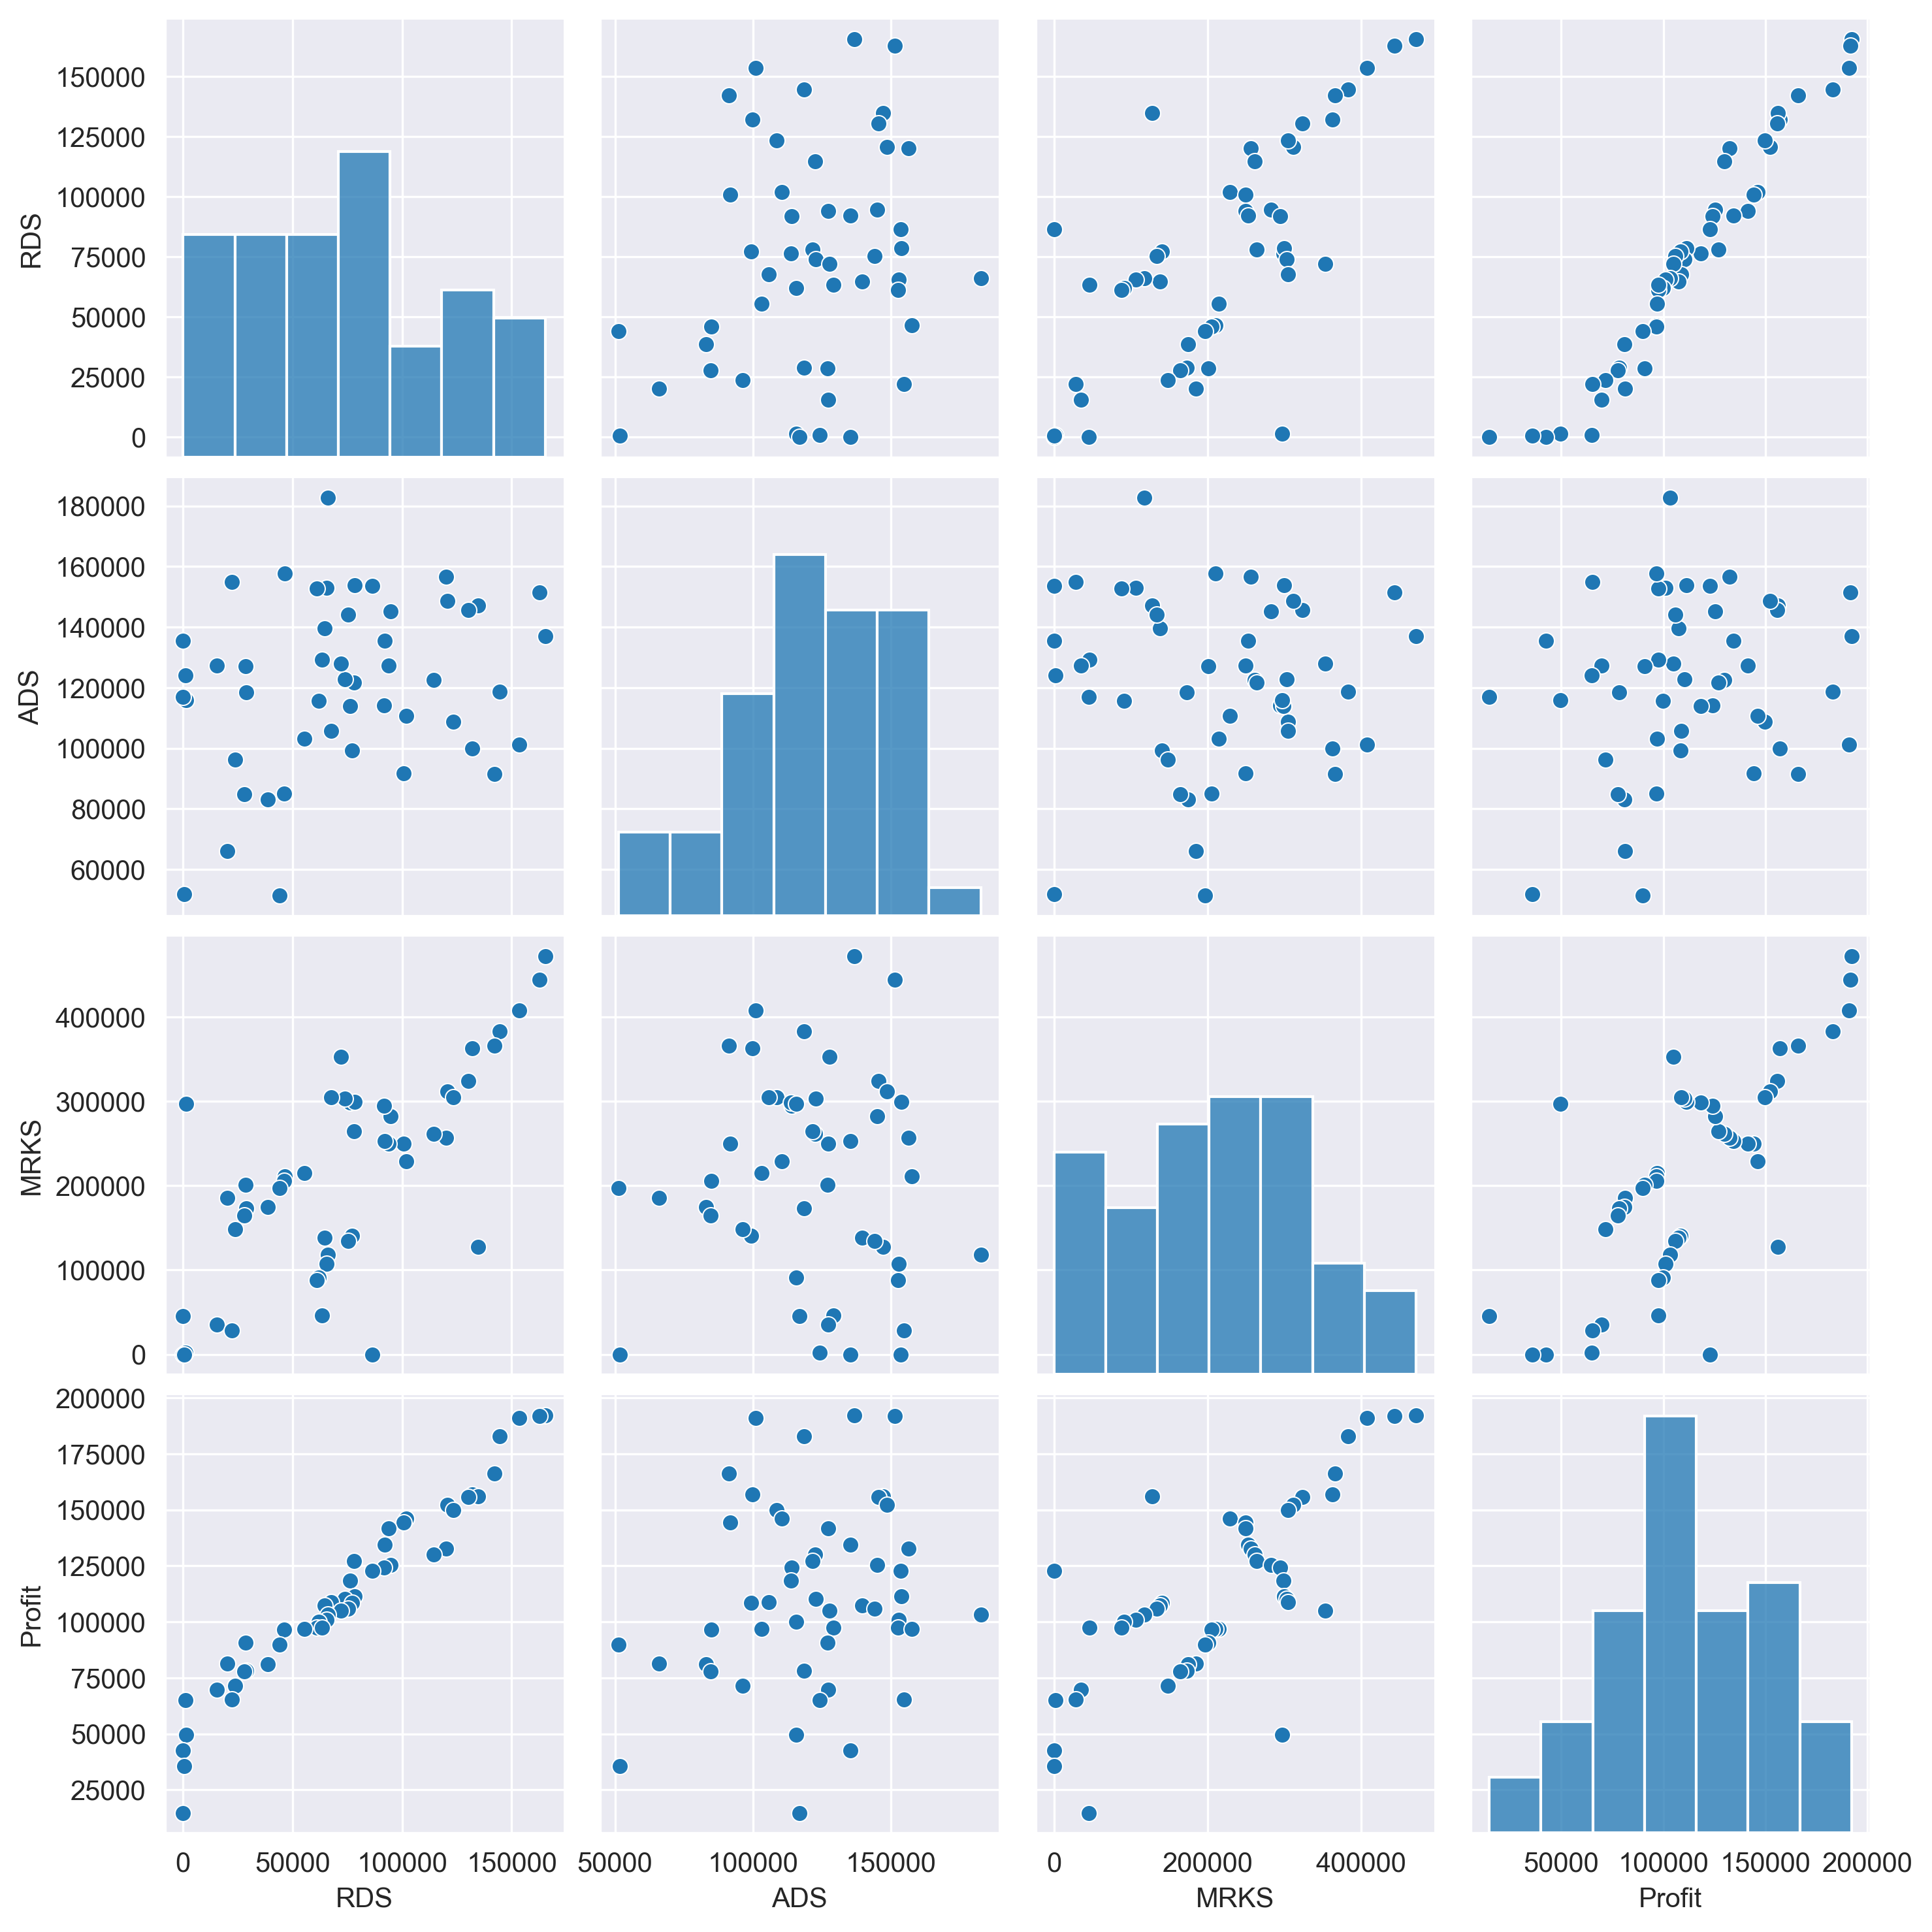

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

RDS       ADS      MRKS    Profit
RDS     1.000000  0.241955  0.724248  0.972900
ADS     0.241955  1.000000 -0.032154  0.200717
MRKS    0.724248 -0.032154  1.000000  0.747766
Profit  0.972900  0.200717  0.747766  1.000000

<AxesSubplot:>

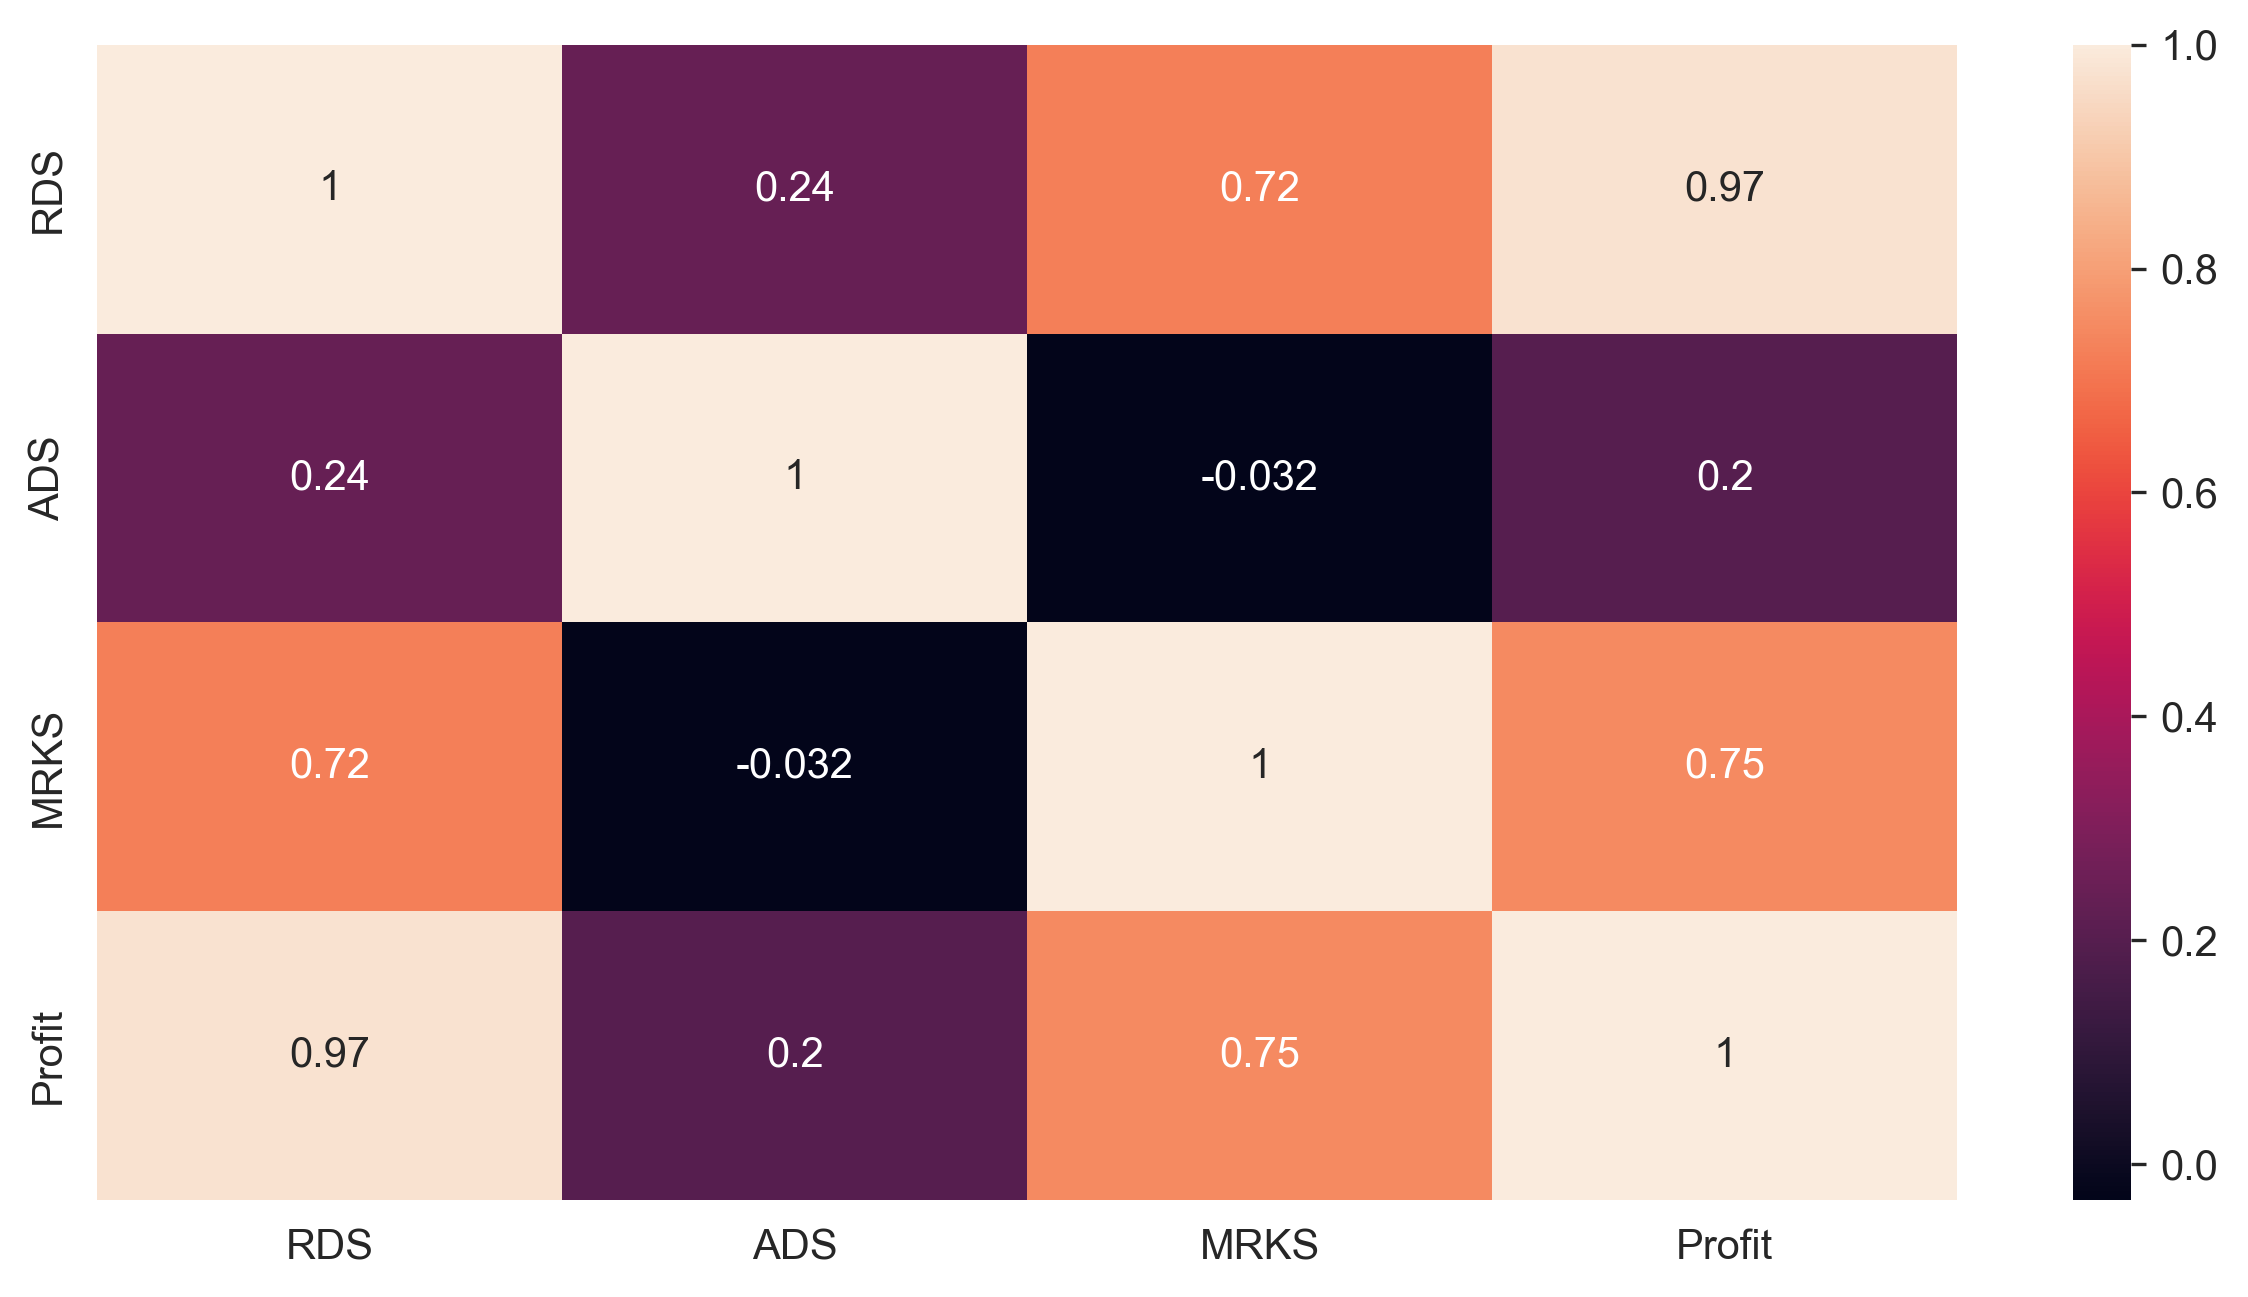

In [13]:
sns.heatmap(df.corr(), annot=True)

    -As we can see, the corralation coefficient between Profit and Administration is very low i.e 02. from this we can say that, Administration column affects least to the target column.
    
    -Also there is a strong correlation between Marketing spend and R&D Spend. So there is multicolinearity present in our independent columns.

# Preparing a Model

    -First, we create a model with all independent columns.

In [14]:
#Build Model

import statsmodels.formula.api as mlr

In [15]:
model1 = mlr.ols('Profit~RDS+ADS+MRKS', data= df).fit()

In [16]:
model1.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MRKS             0.027228
dtype: float64

In [17]:
#Model Summary

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        17:04:26   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADS           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MRKS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#R^2 Value

model1.rsquared, model1.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [19]:
#Print values for t value and p value

print(f"t value is\n{model1.tvalues}\nP value is\n {model1.pvalues}")

t value is
Intercept     7.626218
RDS          17.846374
ADS          -0.525507
MRKS          1.655077
dtype: float64
P value is
 Intercept    1.057379e-09
RDS          2.634968e-22
ADS          6.017551e-01
MRKS         1.047168e-01
dtype: float64


    -From above we see that, P-value for Administration and Marketing Spend is greater than alpha, which means that both columns are not contributing to target column. 
    whereas P-value for R&D Spend is less than alpha, i.e. column R&D Spend contributes to target
    column.

  - **Now, we can build saperate models for Administation and Marketing Spend to check which column among these are affecting our target column**.

# Simple Linear Regression Models

In [20]:
#Profit and marketing spend model

mrks_model= mlr.ols('Profit~MRKS', data=df).fit()

In [21]:
mrks_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.38e-10
Time:                        17:04:26   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MRKS           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#R^2 value

mrks_model.rsquared, mrks_model.rsquared_adj

(0.5591535746115515, 0.5499692740826254)

In [23]:
#Print values for t value and p value

print(f"t value is\n{mrks_model.tvalues}\nP value is\n {mrks_model.pvalues}")

t value is
Intercept    7.808356
MRKS         7.802657
dtype: float64
P value is
 Intercept    4.294735e-10
MRKS         4.381073e-10
dtype: float64


    -From this, we see that the P-value for Marketing spend is less than alpha value, so Marketing spend column contributes to target column.

In [24]:
#Profit and Administration model

ads_model= mlr.ols('Profit~ADS', data=df).fit()

In [25]:
ads_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 27 Feb 2023   Prob (F-statistic):              0.162
Time:                        17:04:26   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADS            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#R^2 Value

ads_model.rsquared, ads_model.rsquared_adj

(0.04028714077757245, 0.020293122877105274)

In [27]:
#Print values for t value and p value

print(f"t value is\n{ads_model.tvalues}\nP value is\n {ads_model.pvalues}")

t value is
Intercept    3.040044
ADS          1.419493
dtype: float64
P value is
 Intercept    0.003824
ADS          0.162217
dtype: float64


    -From above we see that, P-value for Administration column is greater than alpha value, so we can say that Administration column does not contribute to target column.

In [28]:
#Profit and marketing spend, Administration model

mix_model= mlr.ols('Profit~MRKS+ADS', data=df).fit()

In [29]:
mix_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.50e-10
Time:                        17:04:26   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
MRKS           0.2488      0.030      8.281      0.000       0.188       0.309
ADS            0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#R^2 Value

mix_model.rsquared, mix_model.rsquared_adj

(0.6097229746770663, 0.593115441684601)

In [31]:
#Print values for t value and p value

print(f"t value is\n{mix_model.tvalues}\nP value is\n {mix_model.pvalues}")

t value is
Intercept    1.142741
MRKS         8.281039
ADS          2.467779
dtype: float64
P value is
 Intercept    2.589341e-01
MRKS         9.727245e-11
ADS          1.729198e-02
dtype: float64


    -From above we see that, P-value for both columns are less than aplha value, so we can say 
    that, both columns are togather affecting target column.

# Model Validation

# VIF

In [32]:
r_ads= mlr.ols('ADS~MRKS+RDS', data=df).fit().rsquared
v_ads= 1/(1-r_ads)

r_mrks= mlr.ols('MRKS~ADS+RDS', data=df).fit().rsquared
v_mrks= 1/(1-r_mrks)

r_rds= mlr.ols('RDS~MRKS+ADS', data=df).fit().rsquared
v_rds= 1/(1-r_rds)

In [33]:
d= ({
    'Feature':['ADS','MRKS','RDS'],
    'VIF': [v_ads,v_mrks,v_rds]
})

vif= pd.DataFrame(d)
vif

Feature       VIF
0     ADS  1.175091
1    MRKS  2.326773
2     RDS  2.468903

# Residual Analysis (Q-Q Plot)

In [34]:
res=model1.resid
res

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [35]:
res.mean()

7.625203579664231e-11

Text(0.5, 1.0, 'Q-Q plot of Normality of residuals')

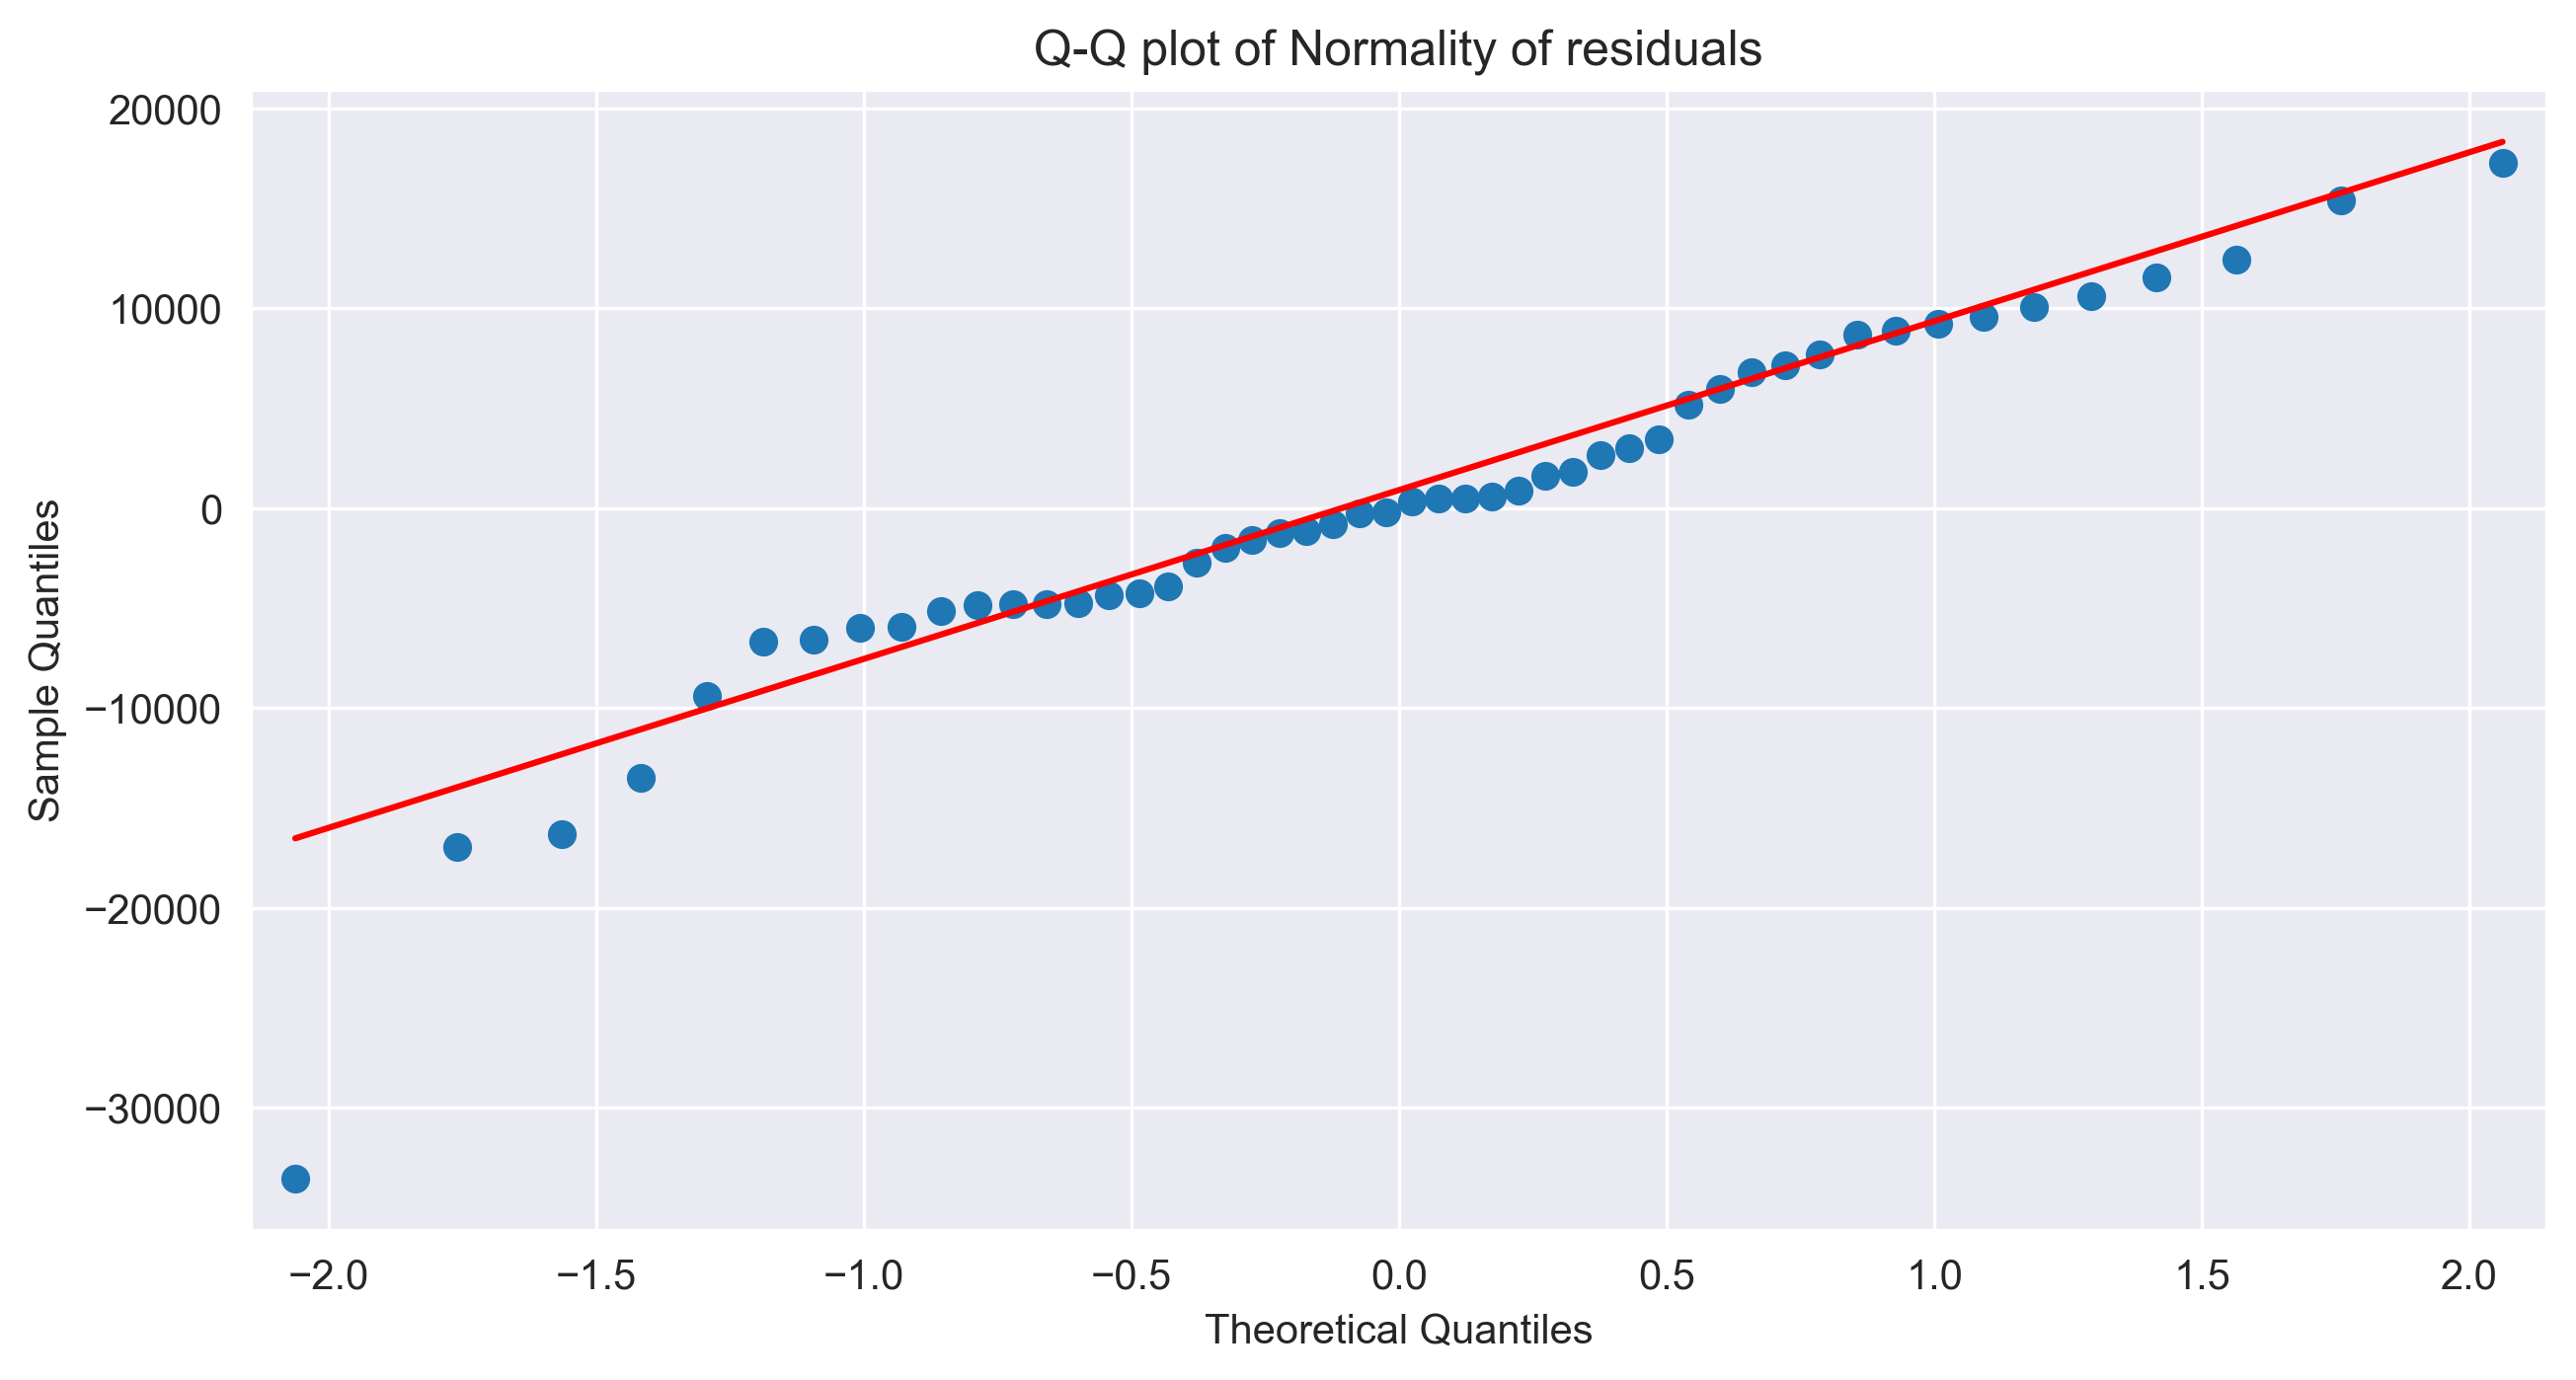

In [36]:
import statsmodels.api as sm

sm.qqplot(res, line='q')
plt.title('Q-Q plot of Normality of residuals')

In [37]:
list(np.where(model1.resid<-30000))

[array([49], dtype=int64)]

In [38]:
 ##Test for Homoscedasticity or Heteroscedasticity

In [39]:
def get_standardized_value(vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'Residuals')

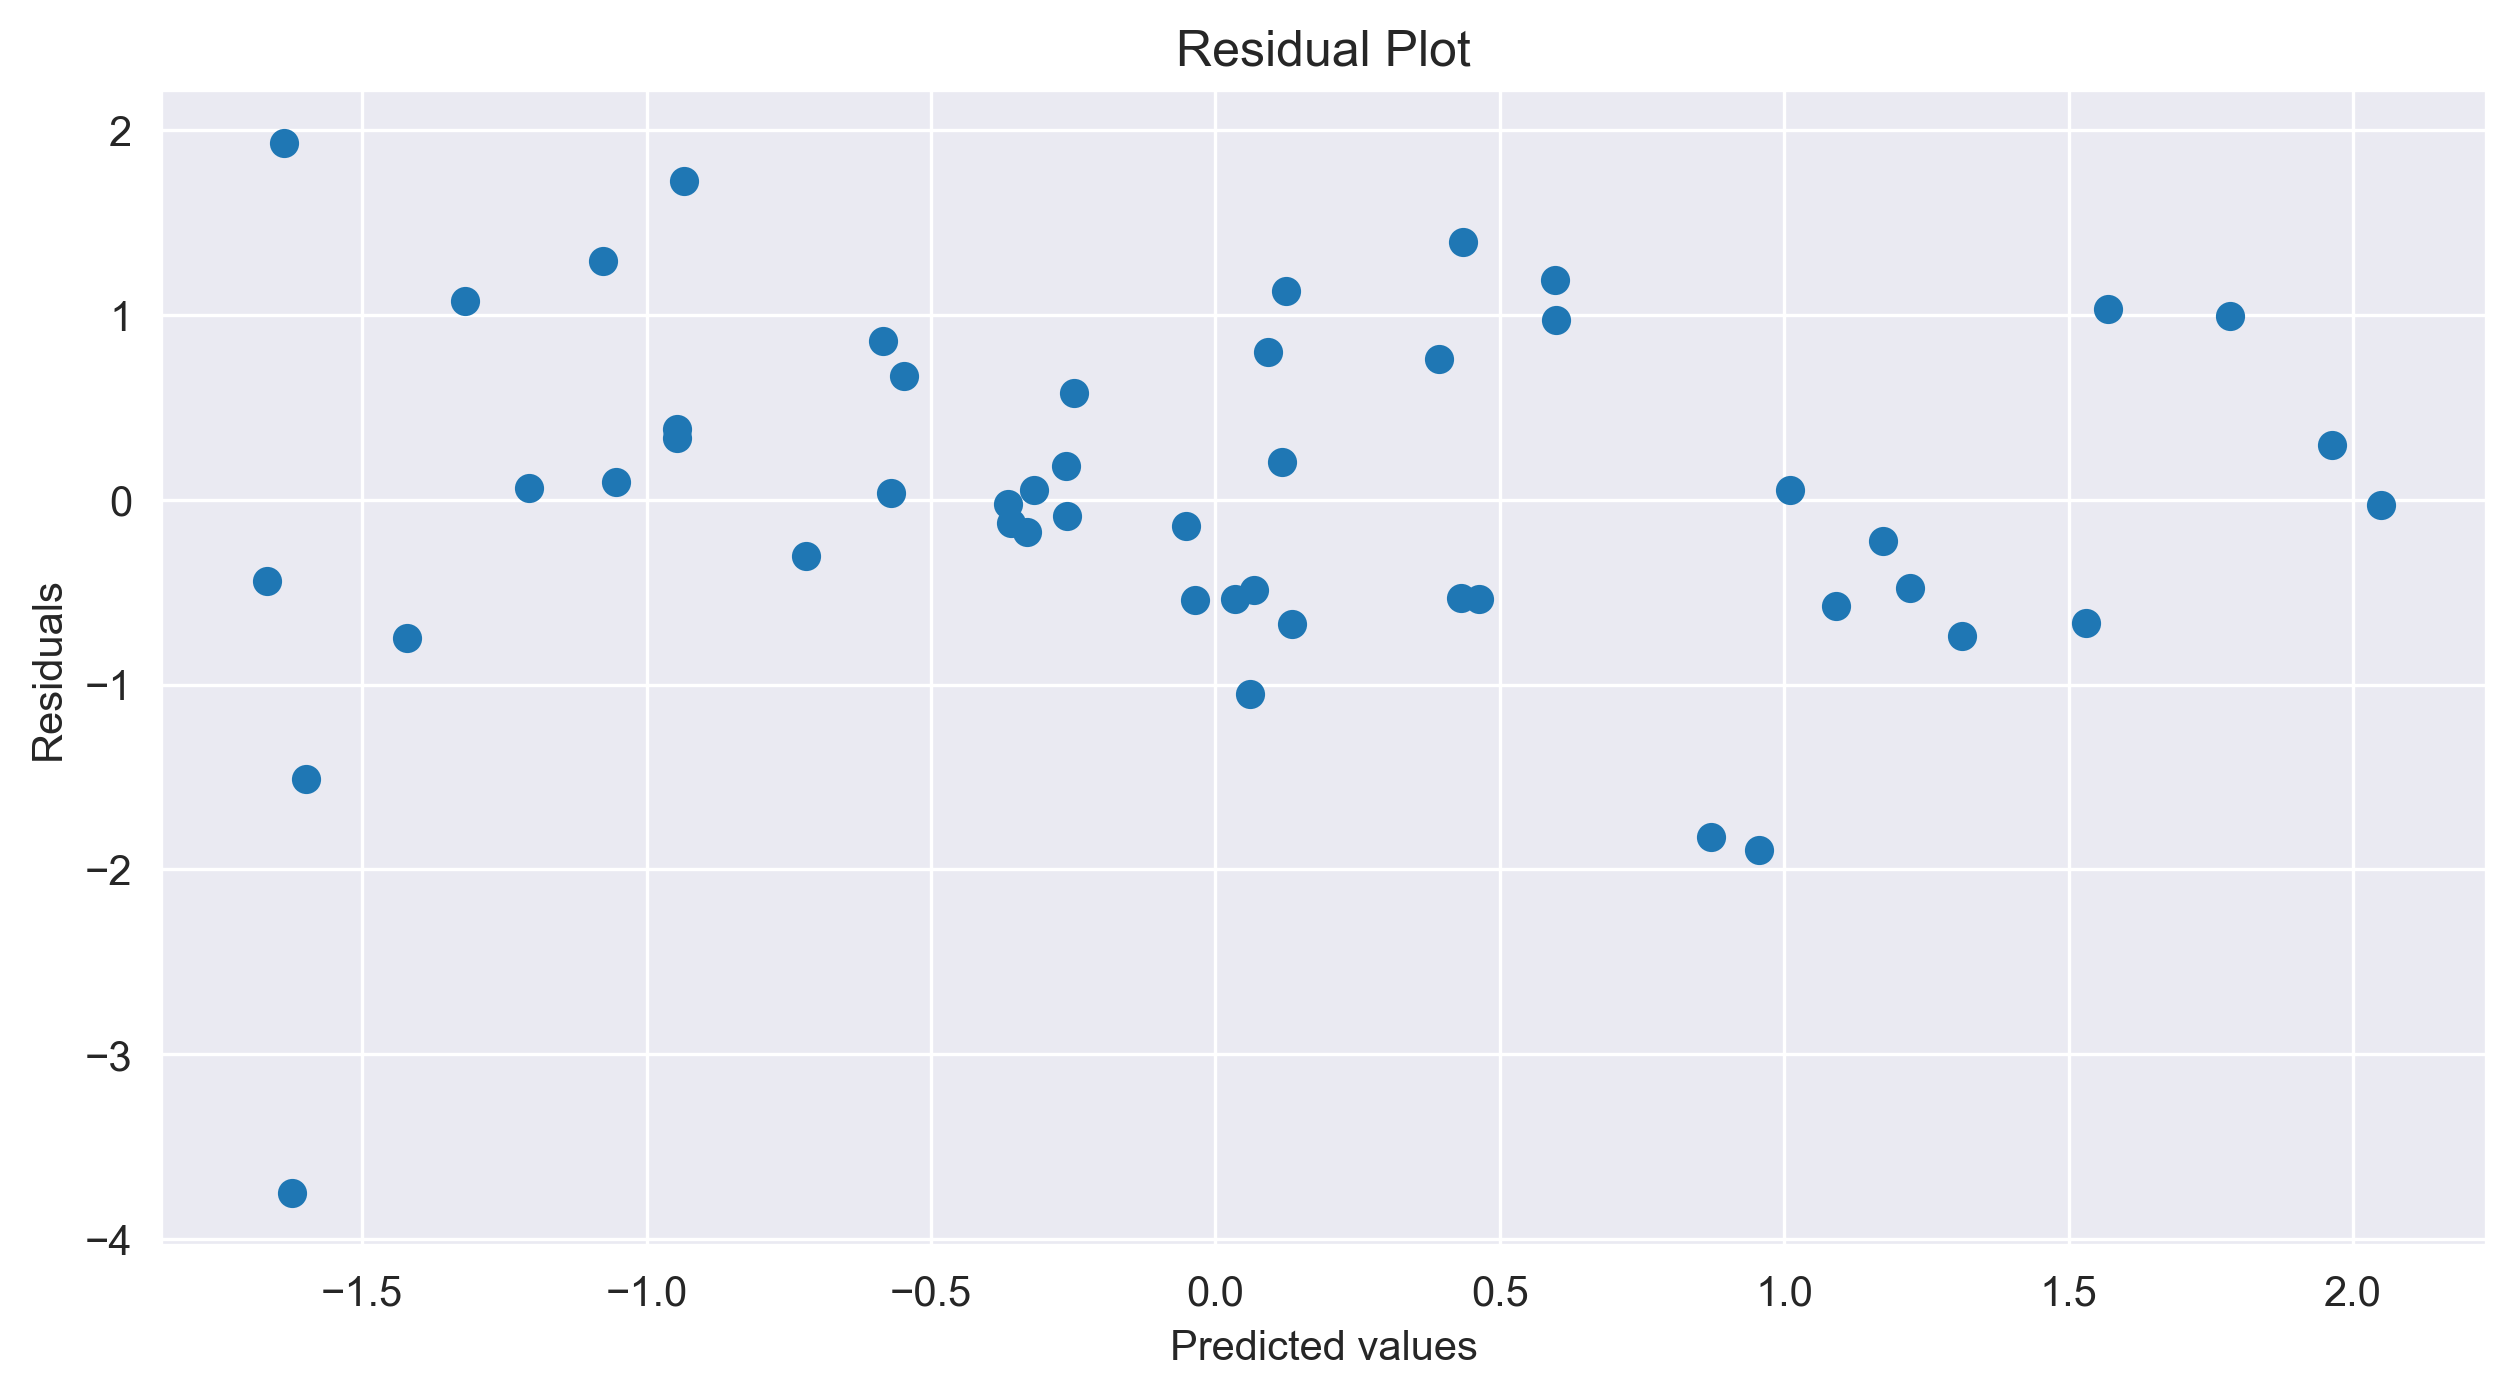

In [40]:
plt.scatter(get_standardized_value(model1.fittedvalues),get_standardized_value(model1.resid))
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

In [41]:
##Using Residual Regression Plots code graphics.plot_regress_exog

In [42]:
from statsmodels.graphics.regressionplots import influence_plot

eval_env: 1


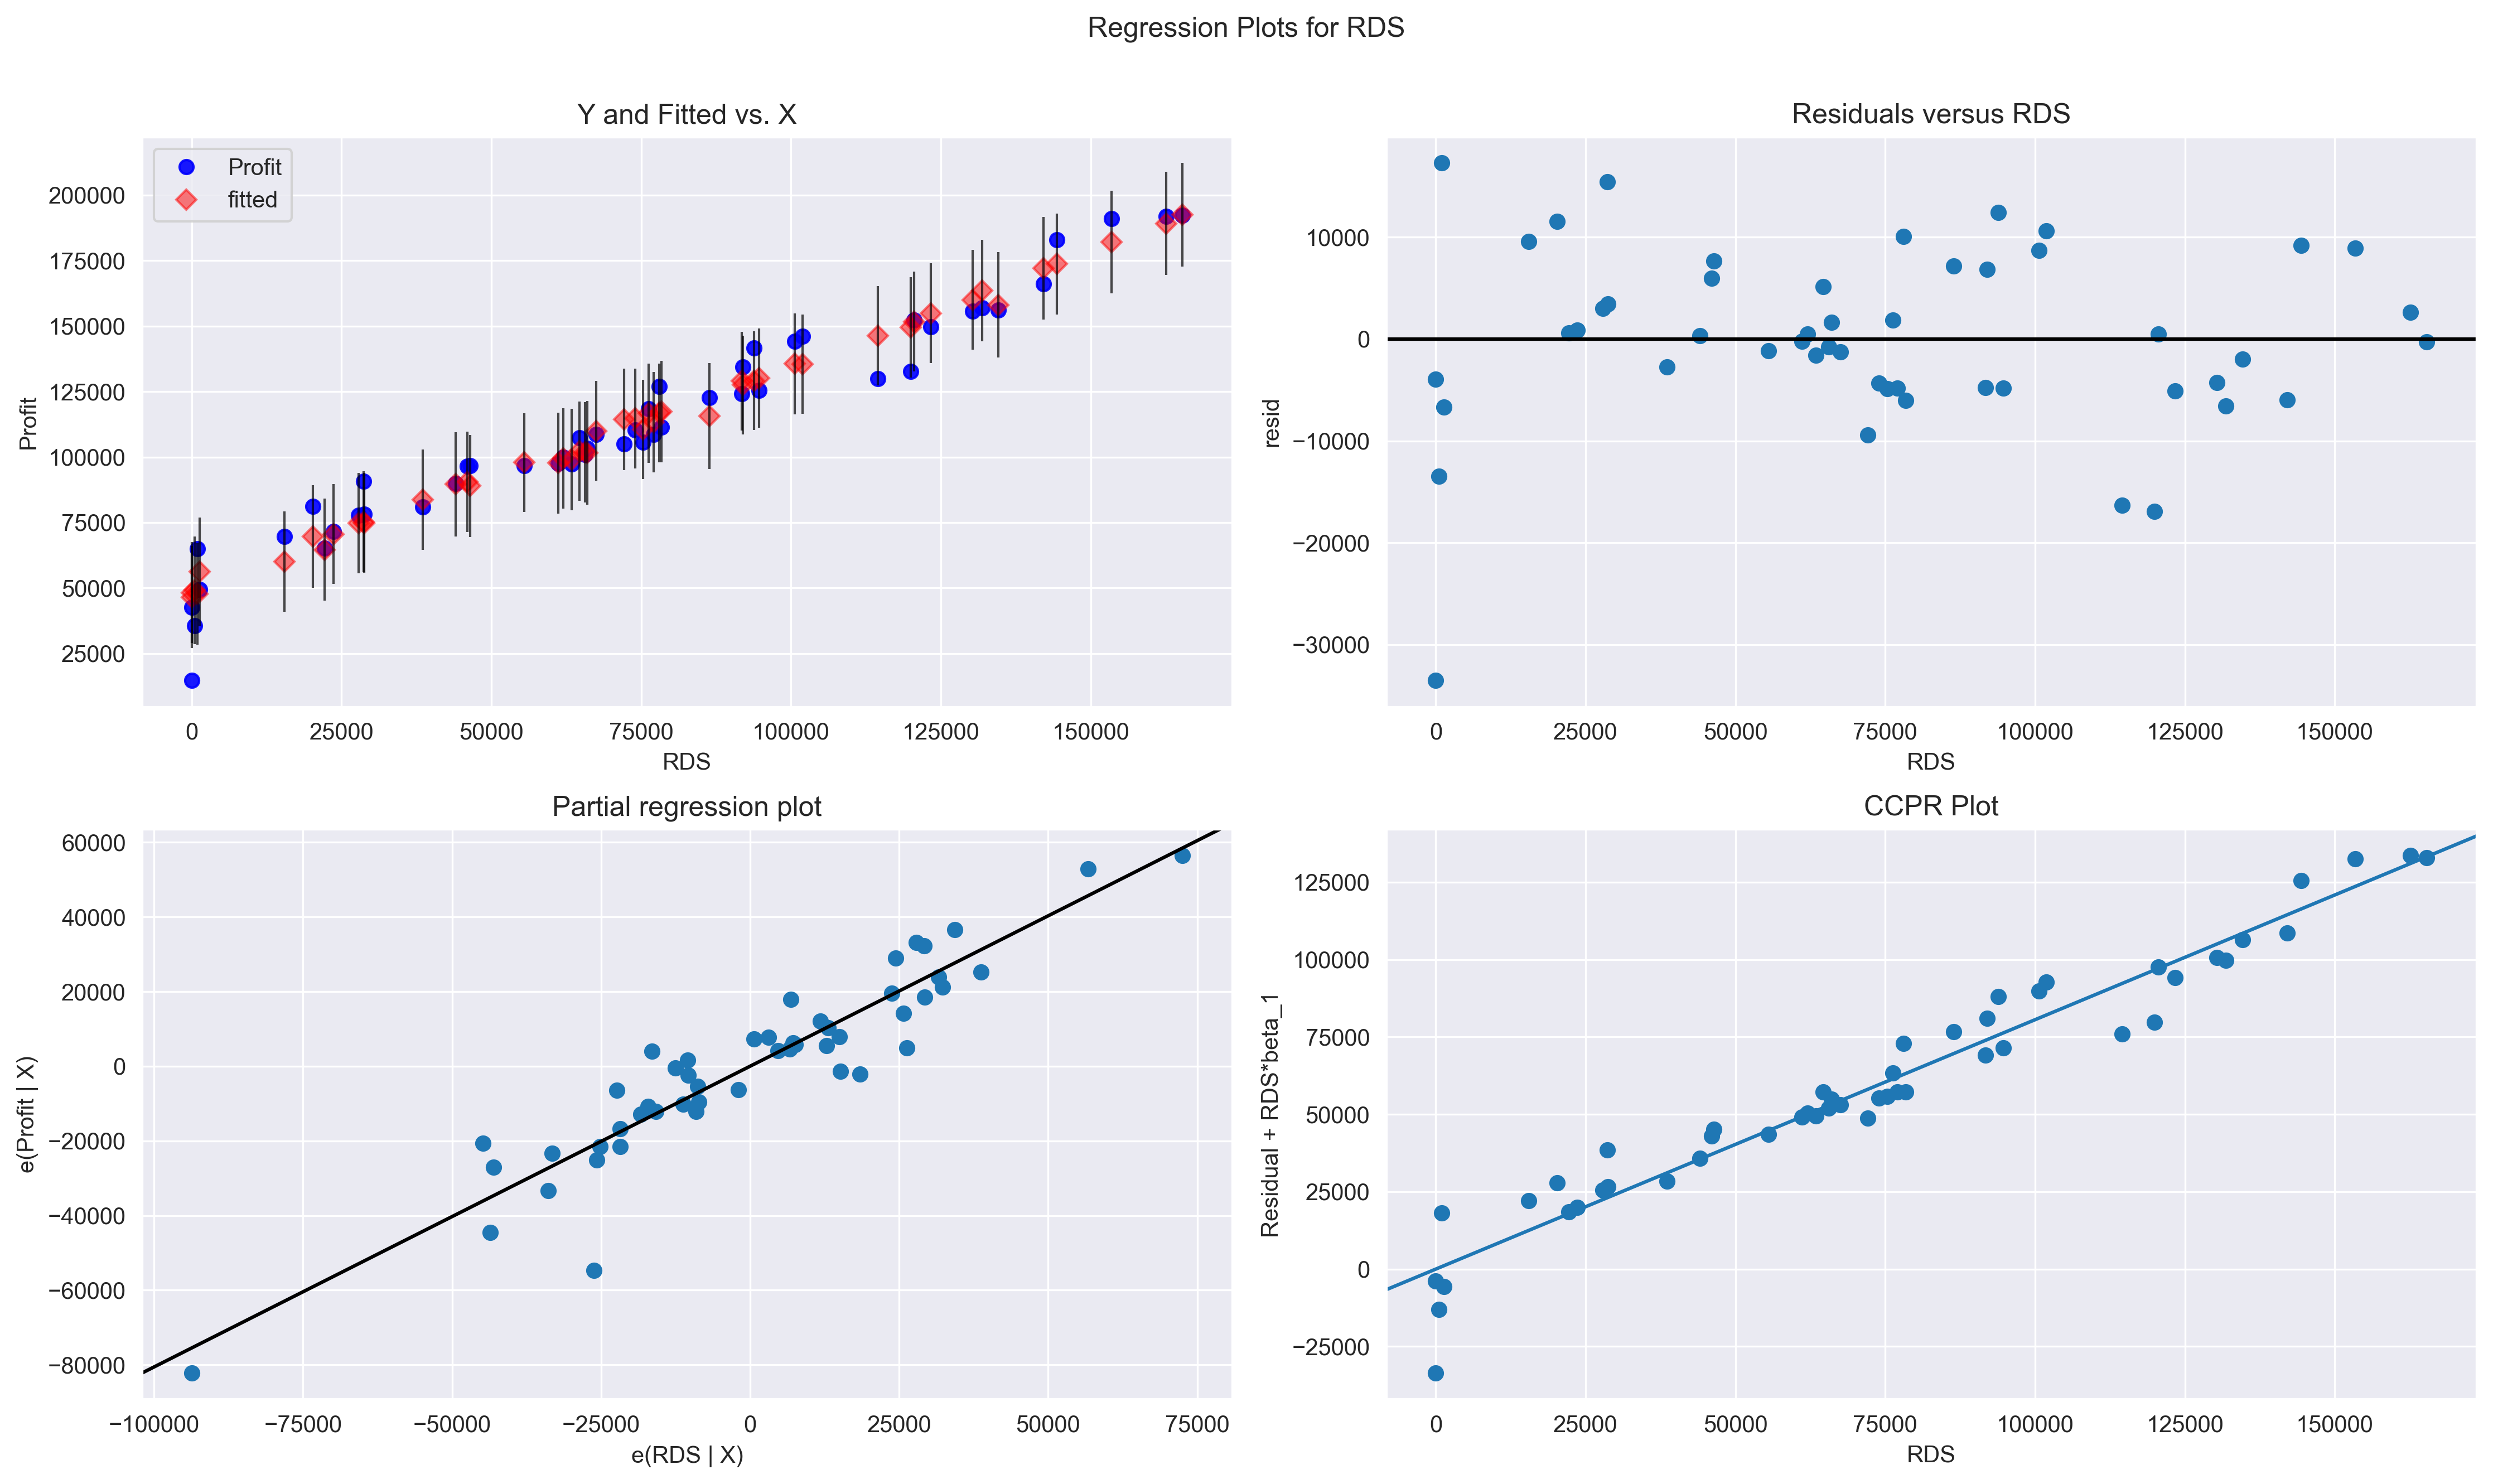

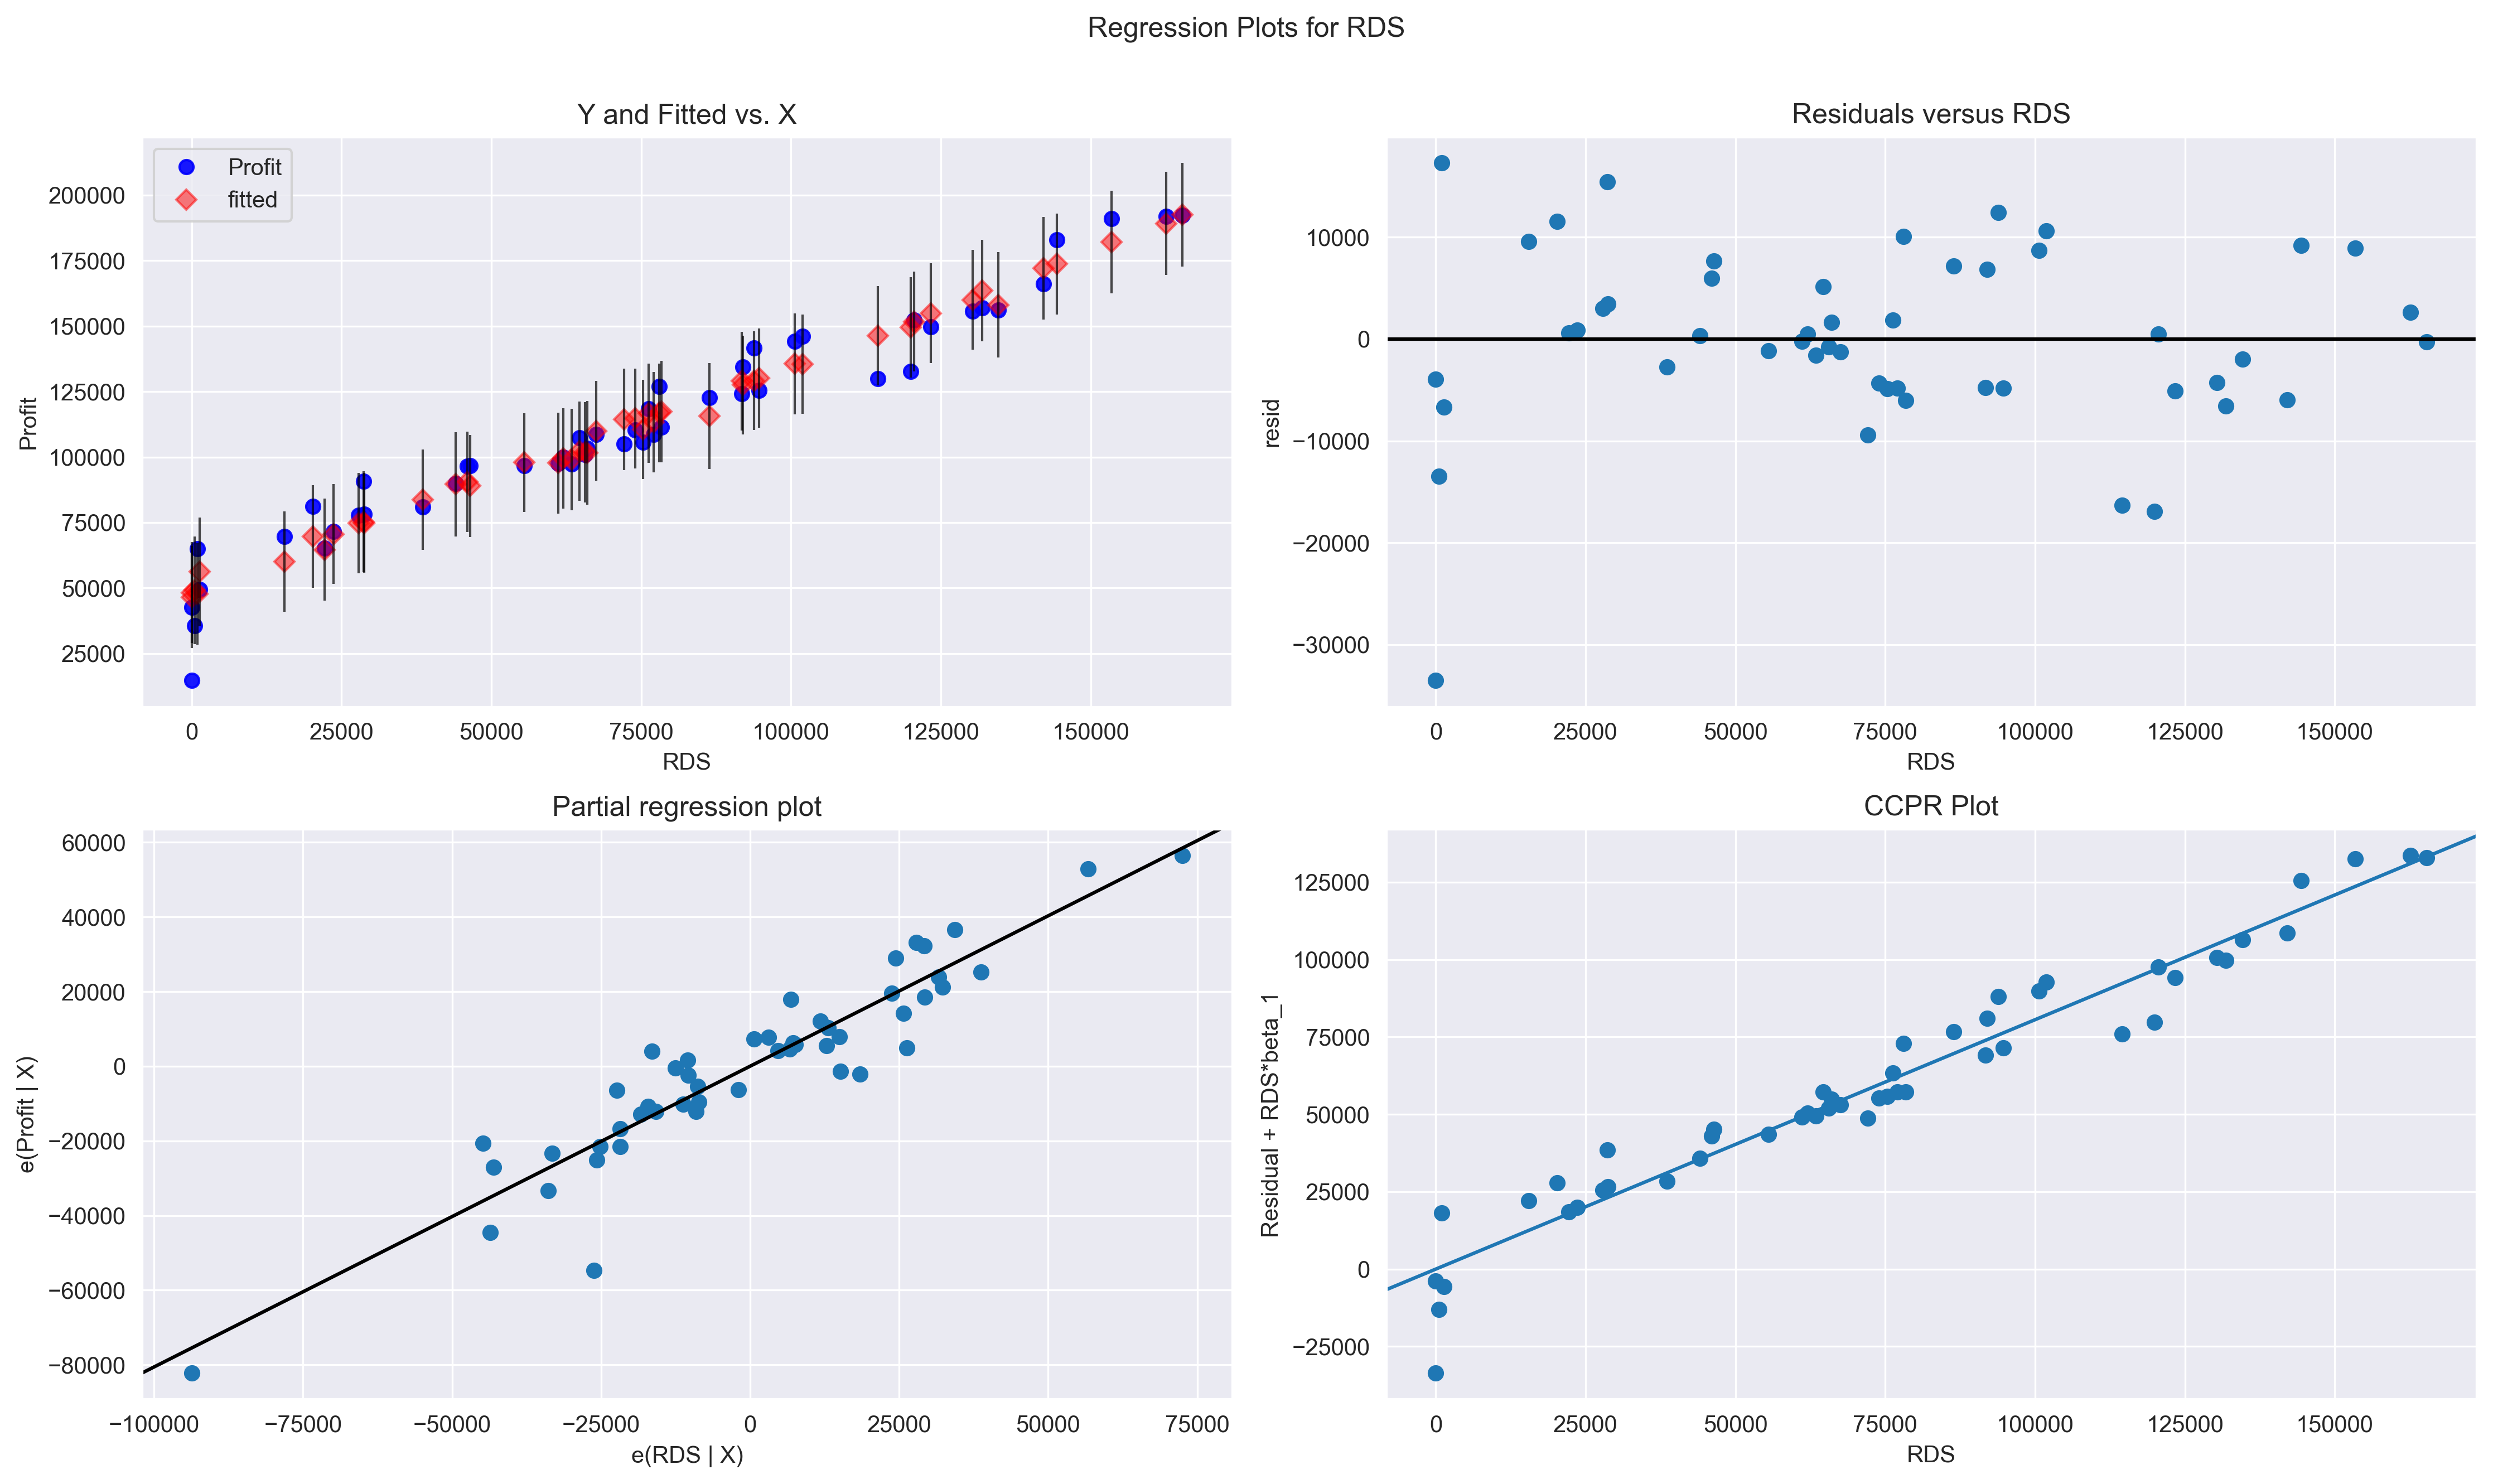

In [43]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model1,'RDS',fig=fig)

eval_env: 1


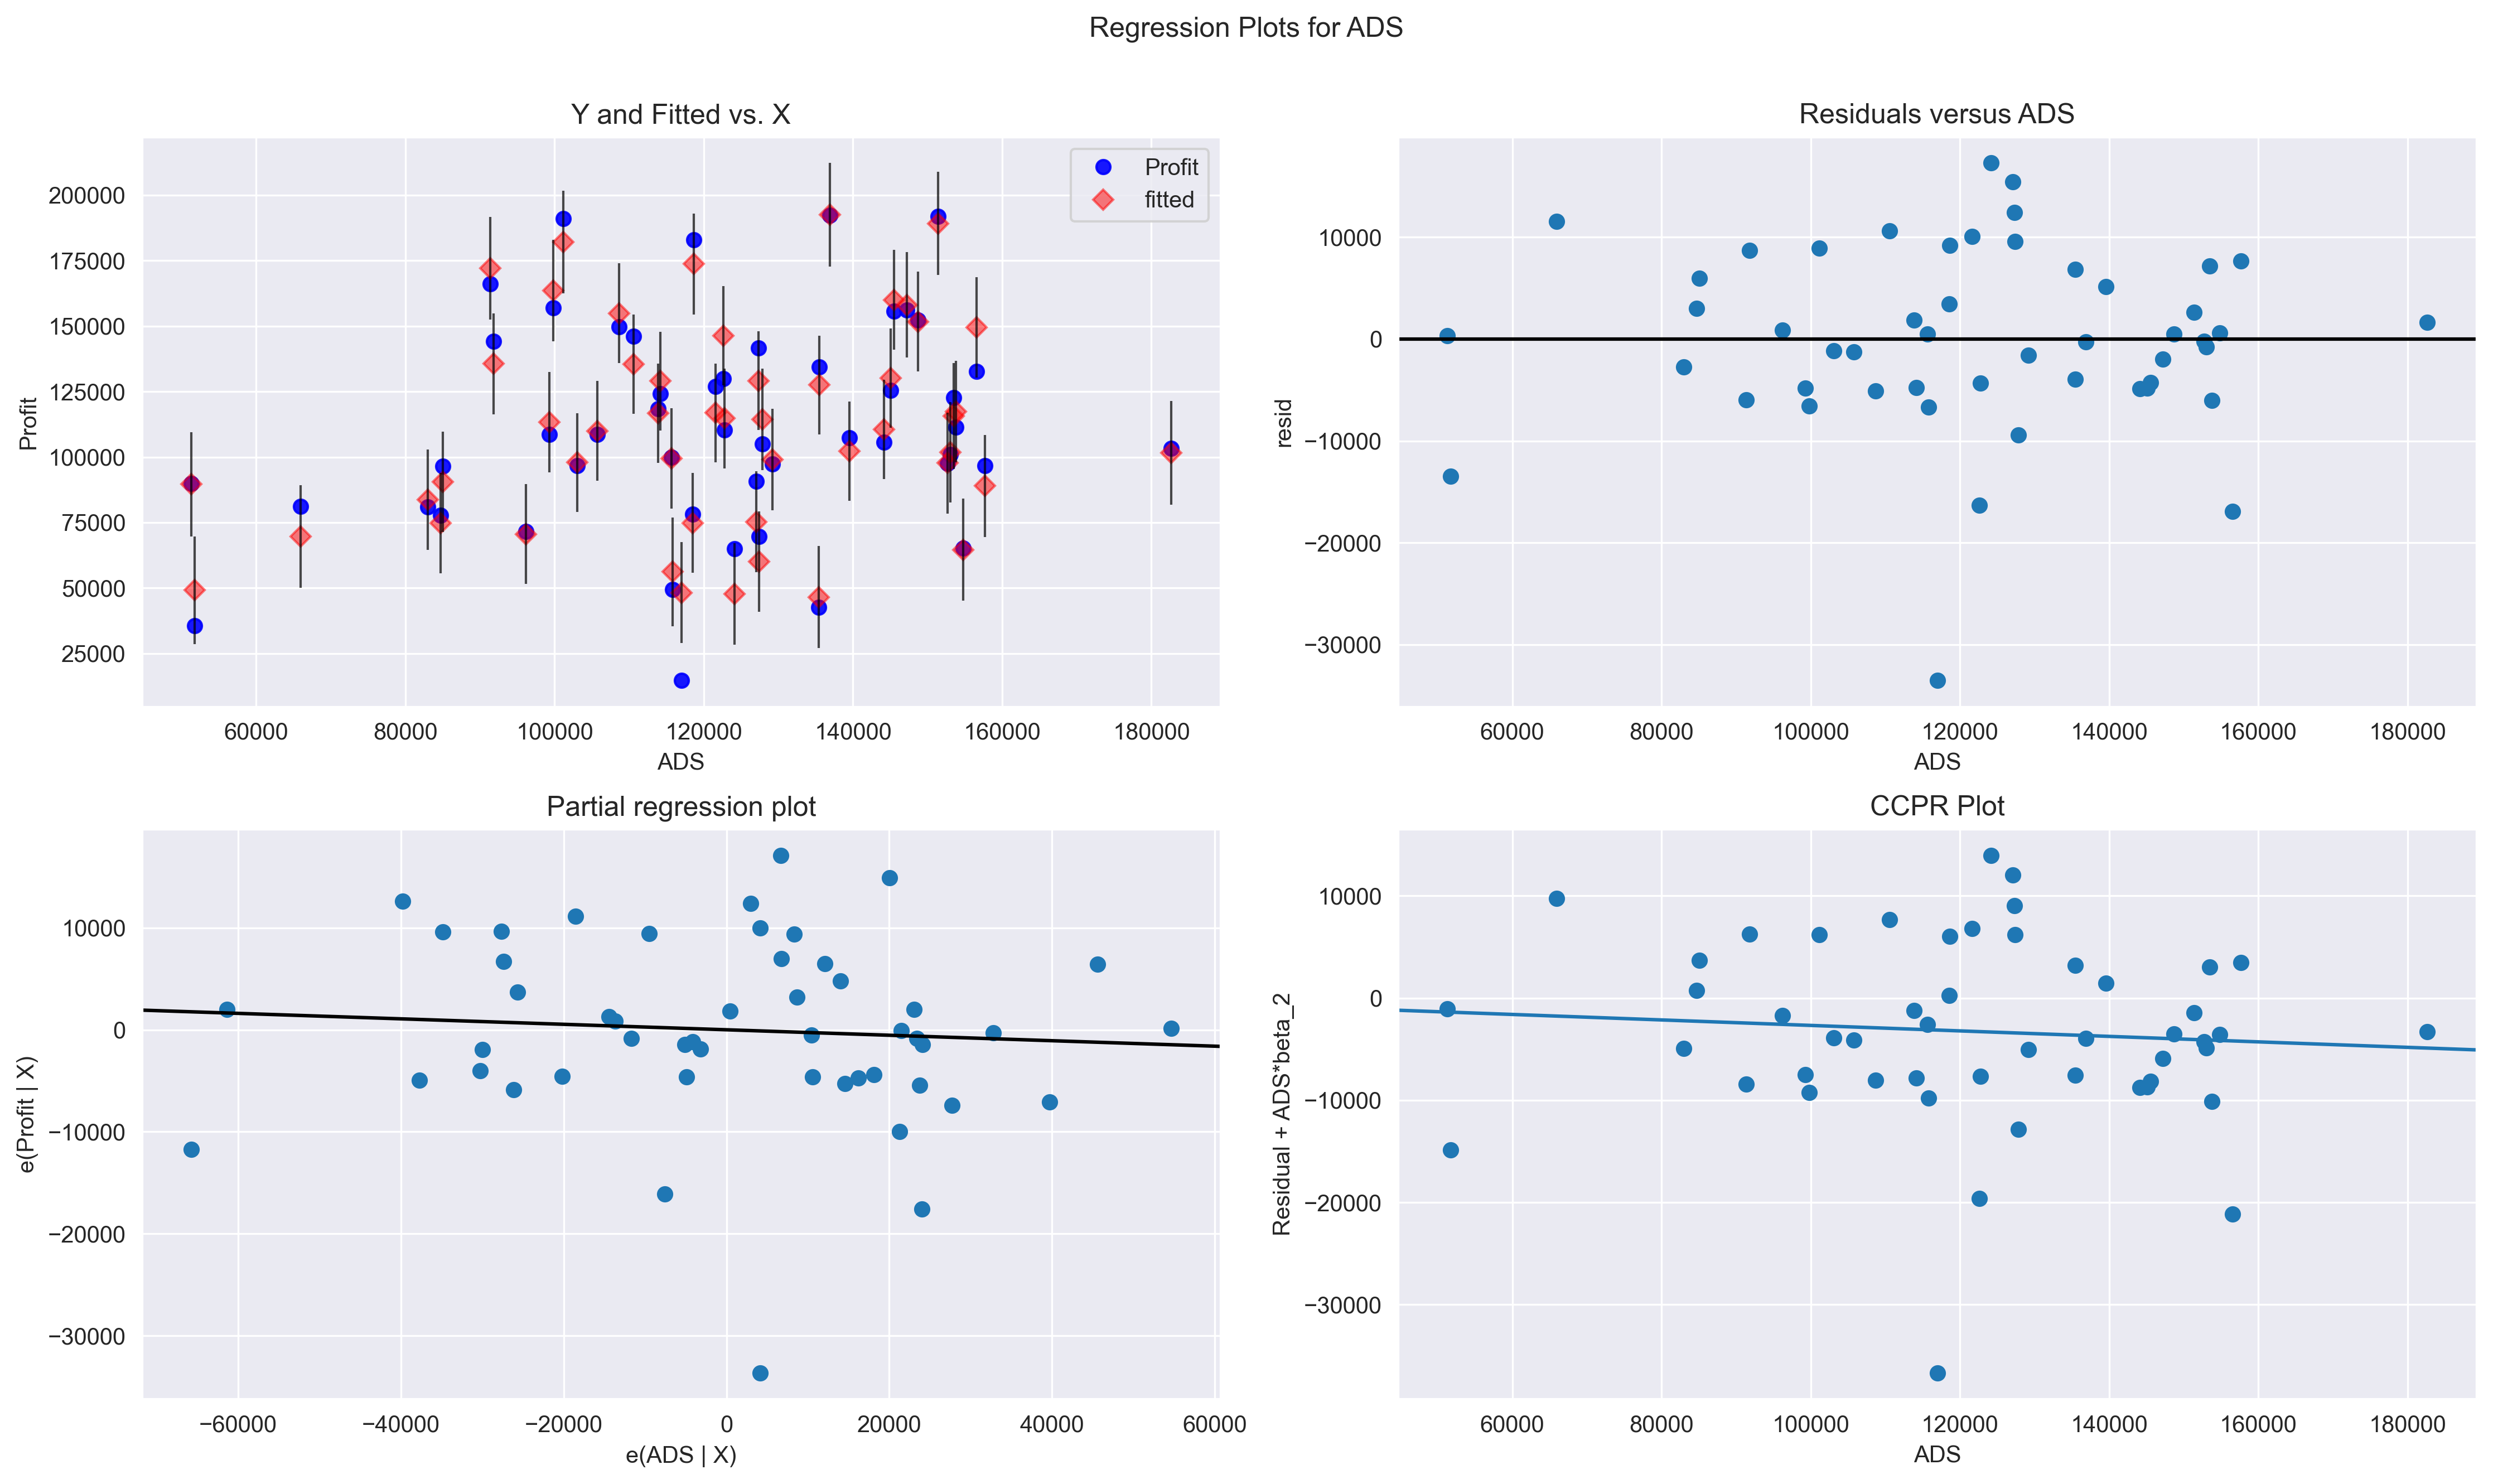

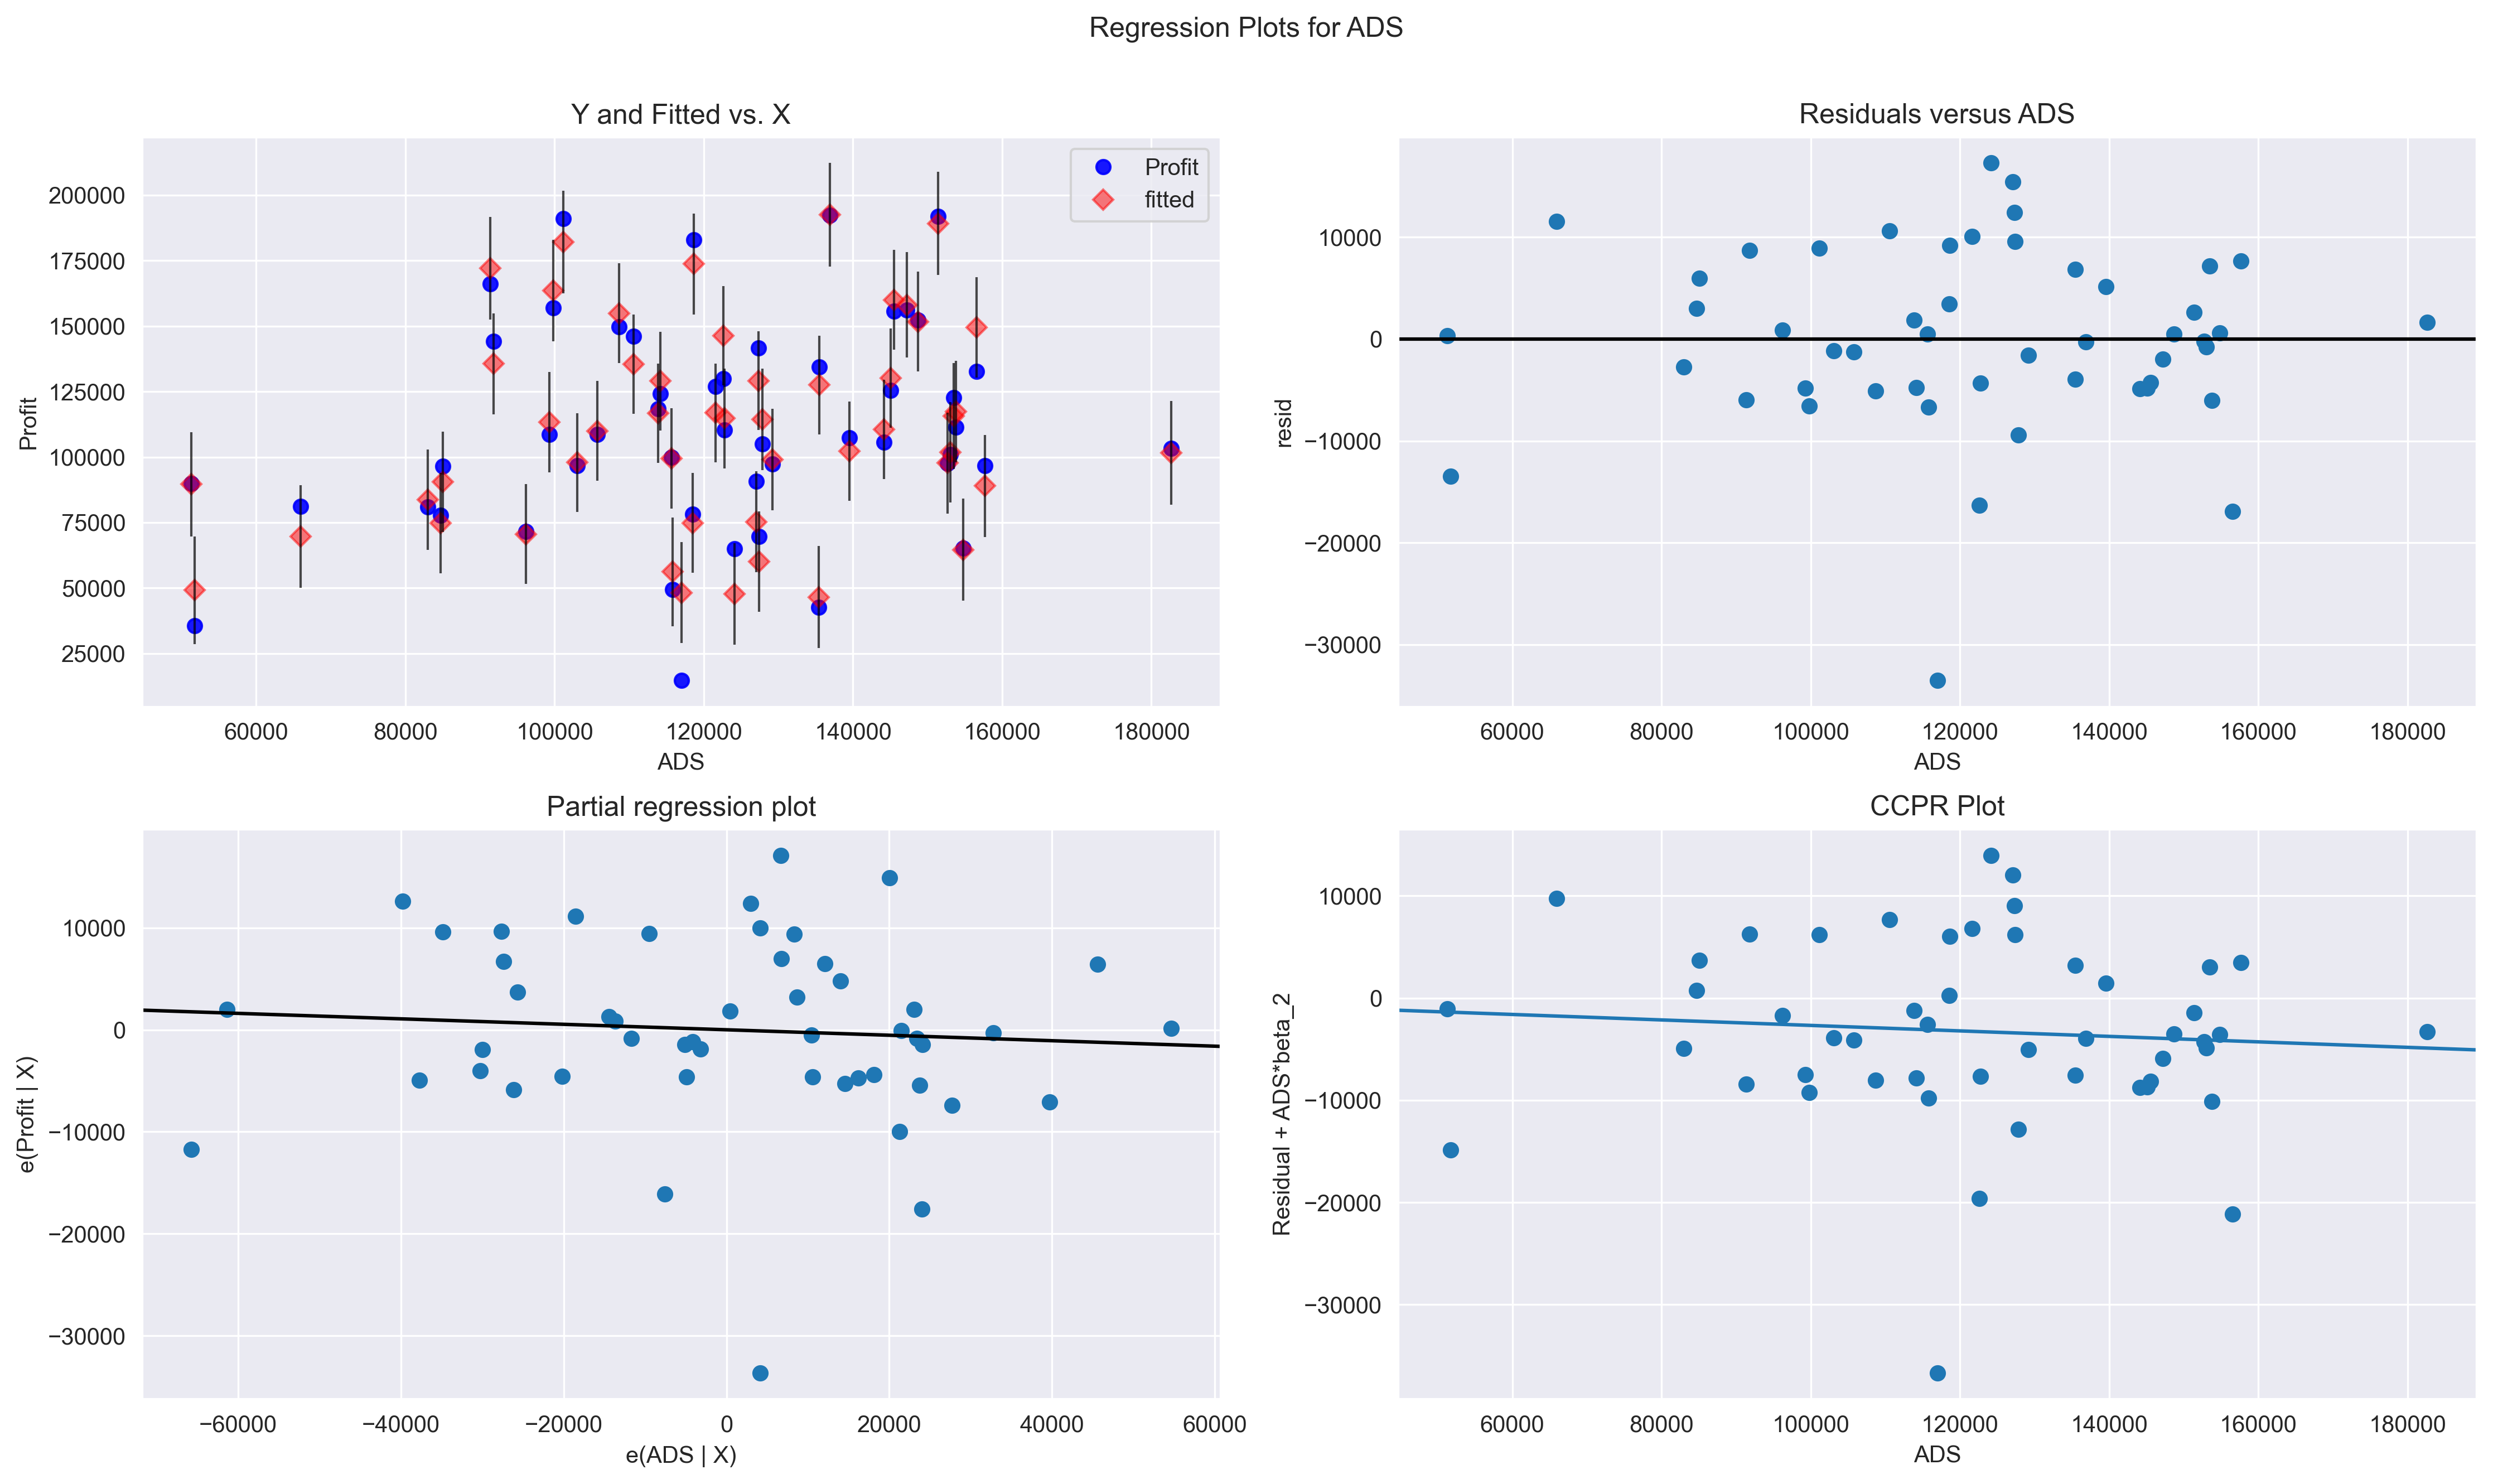

In [44]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model1,'ADS',fig=fig)

eval_env: 1


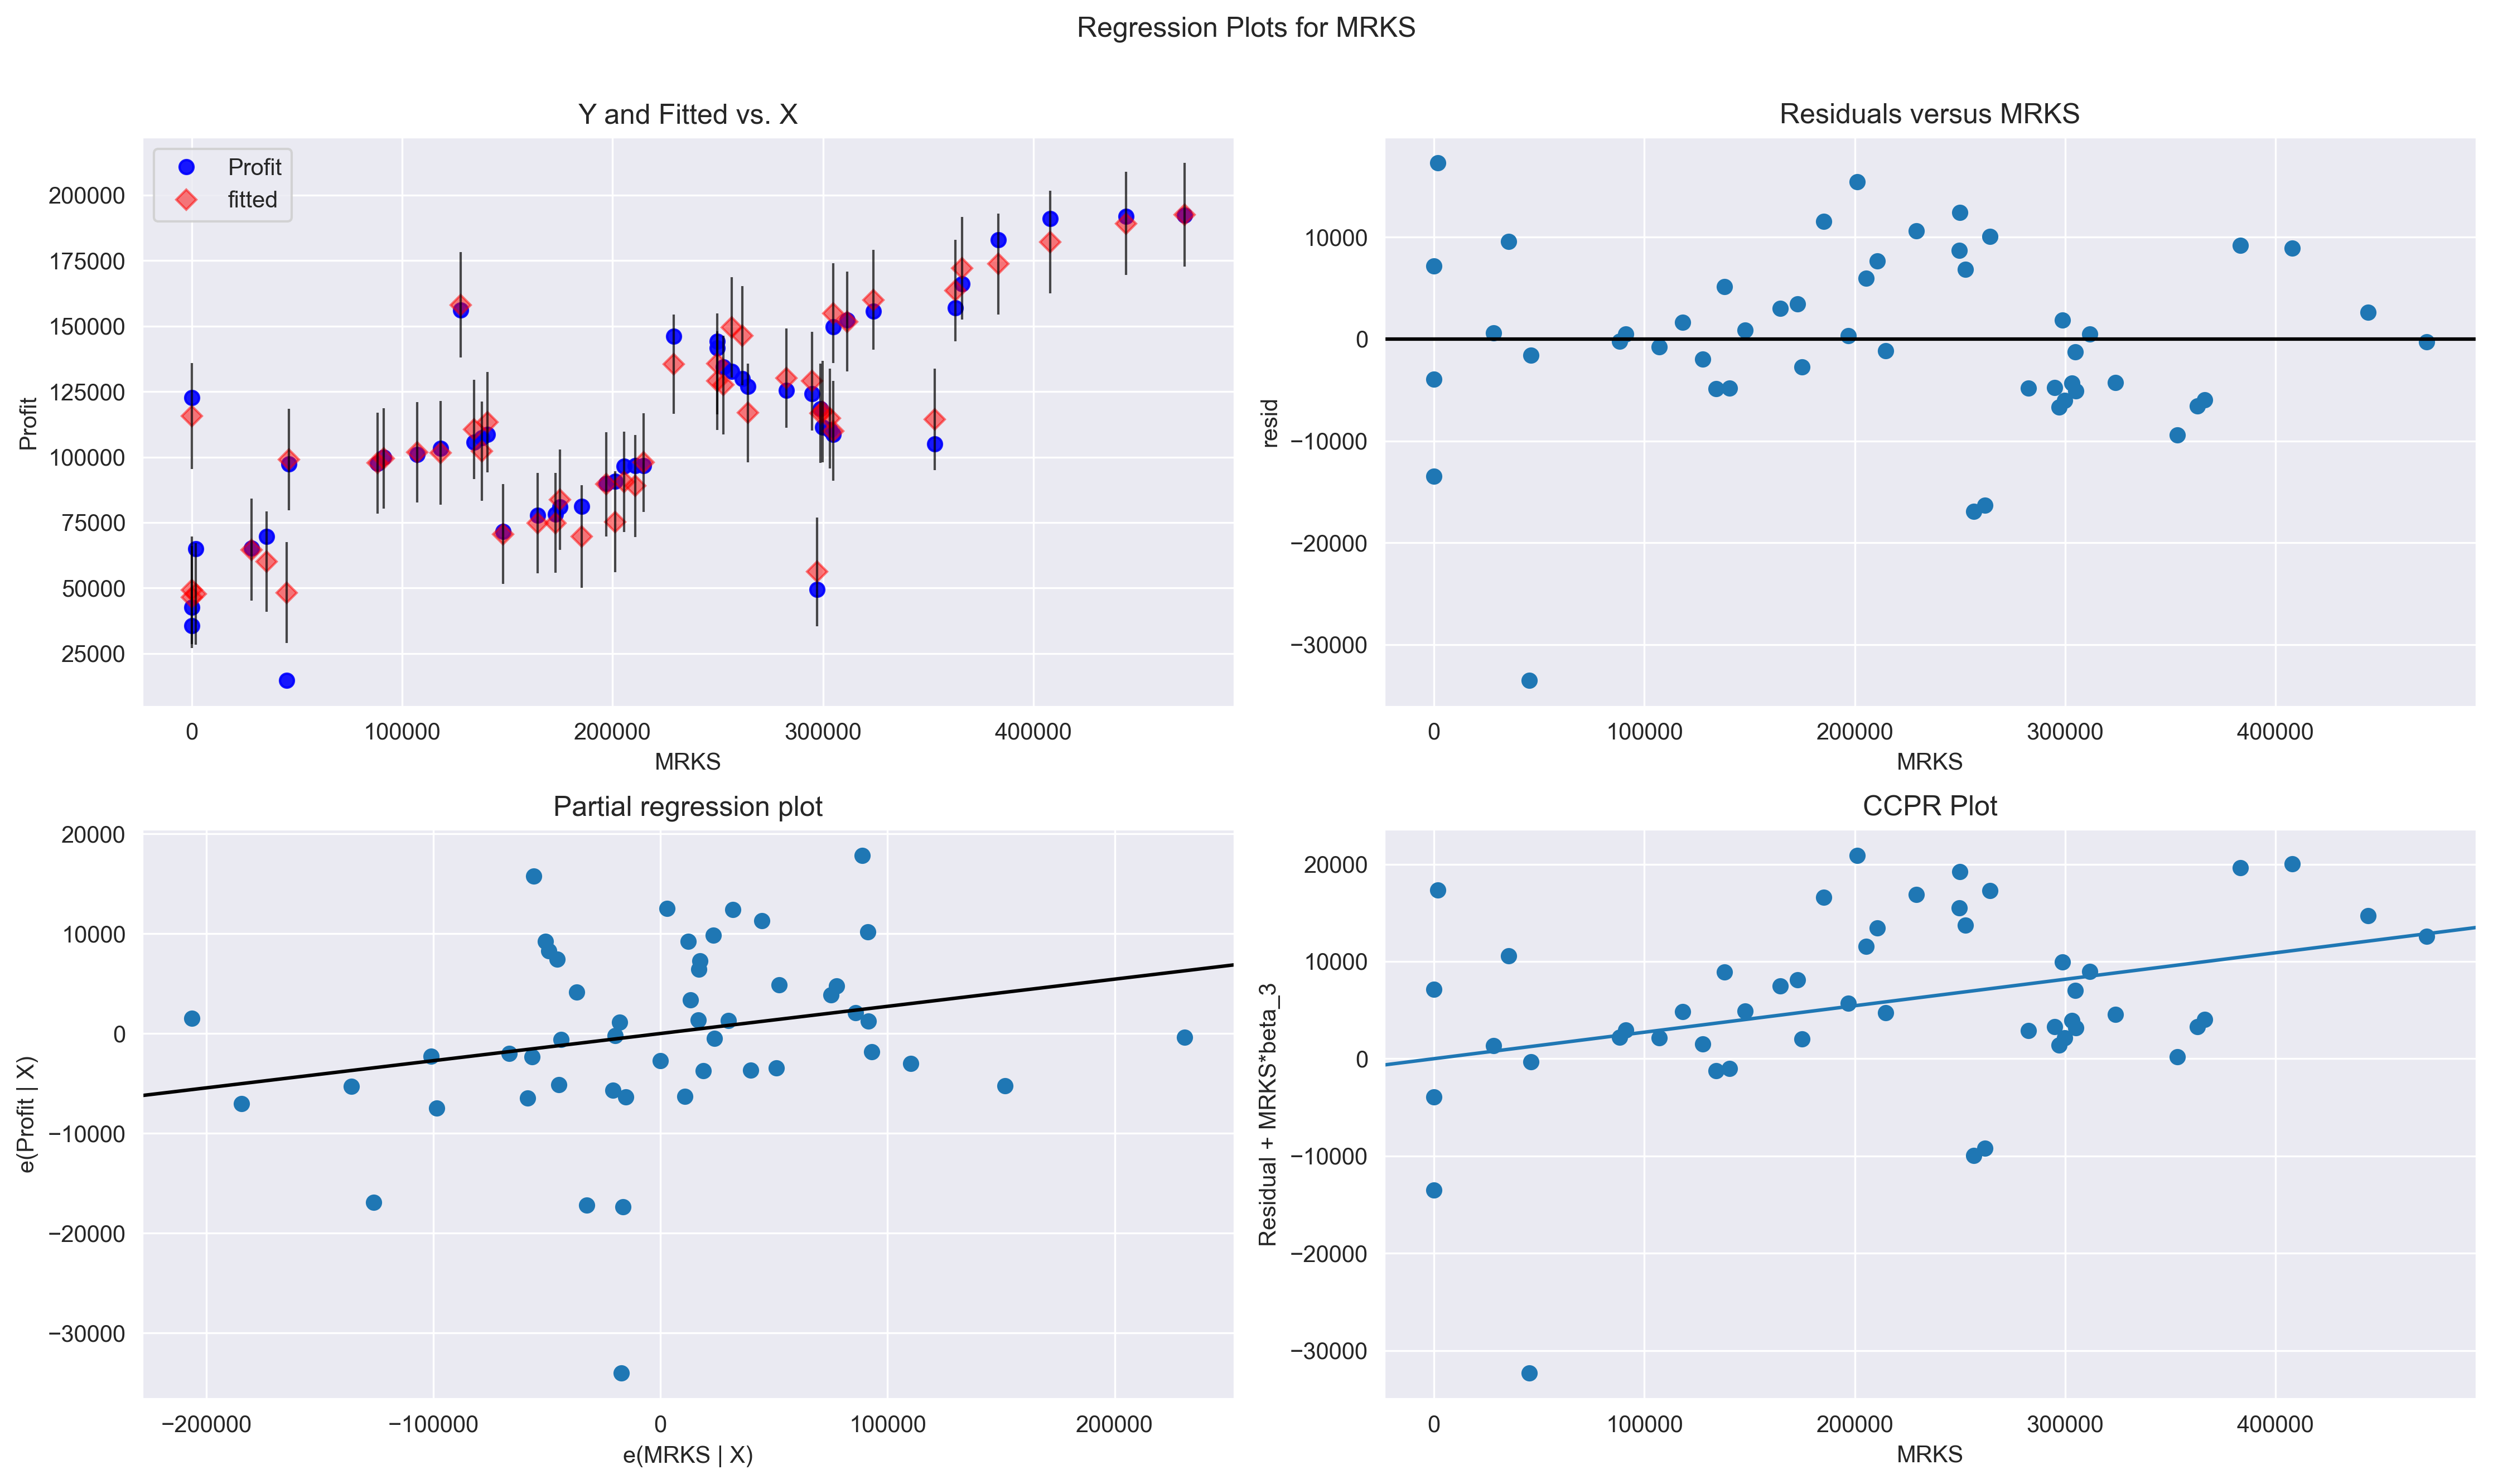

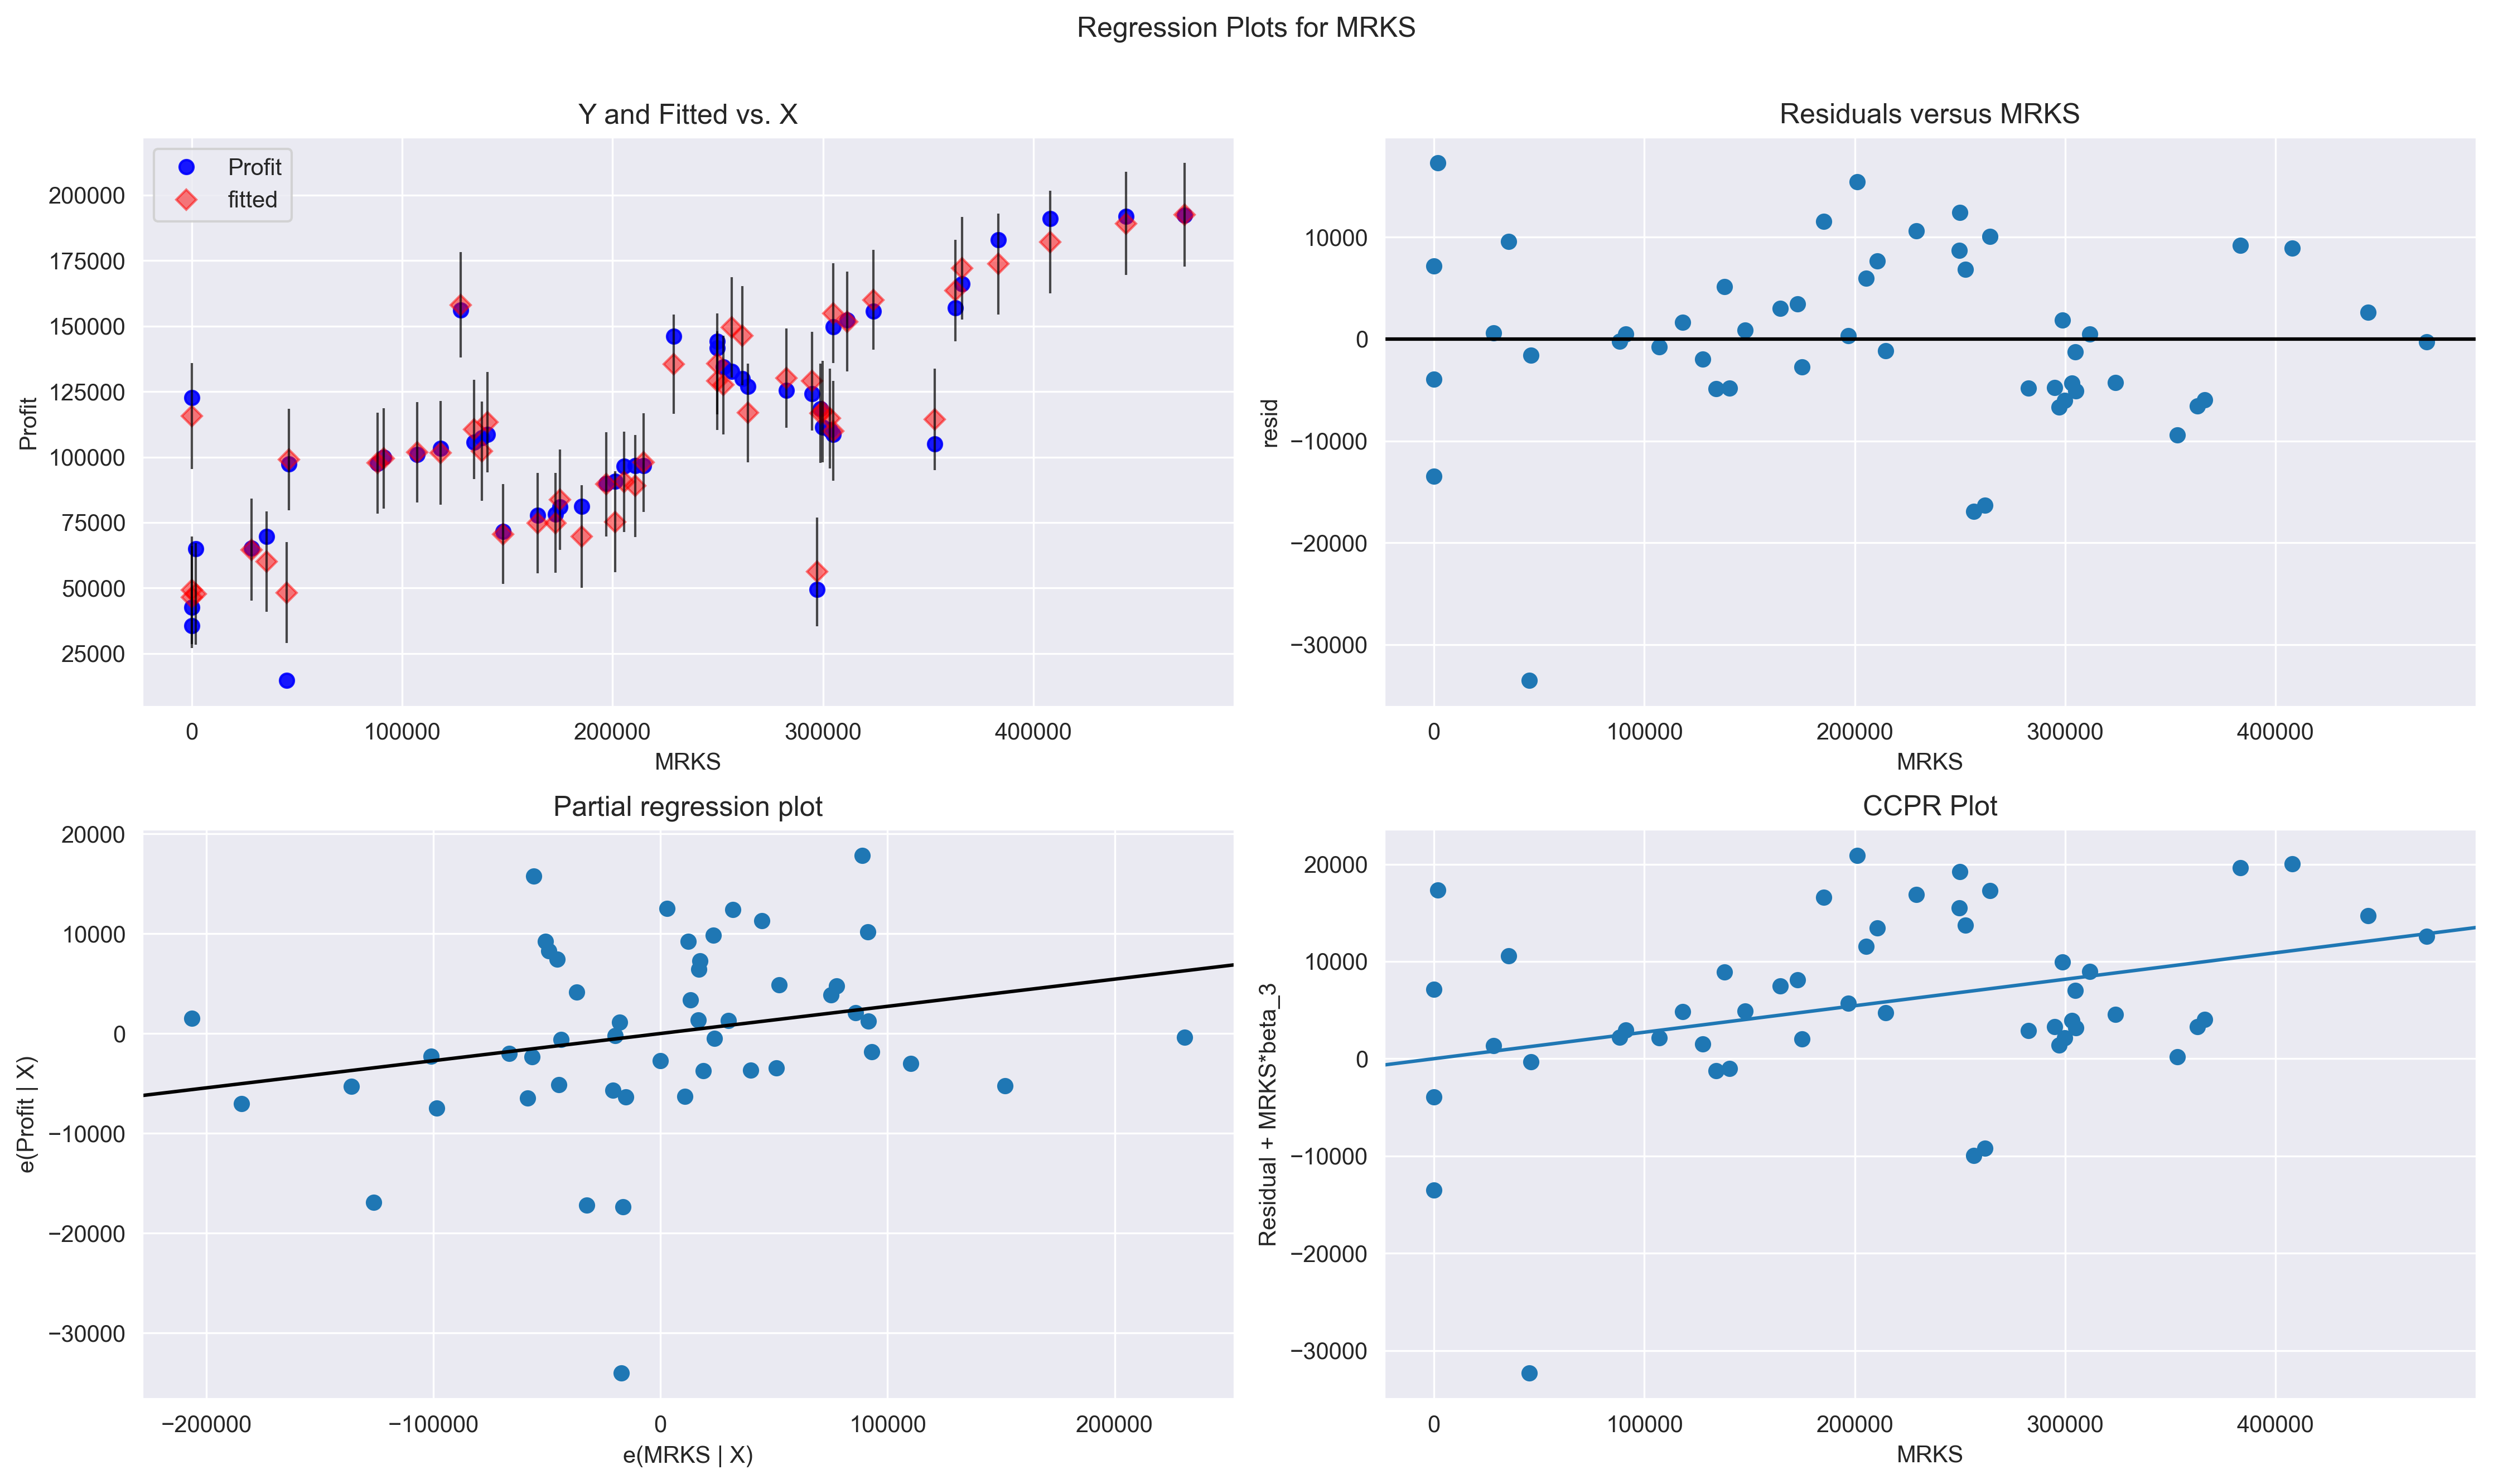

In [45]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model1,'MRKS',fig=fig)

# Cook Distance

In [46]:
model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

Text(0, 0.5, 'Cooks distance')

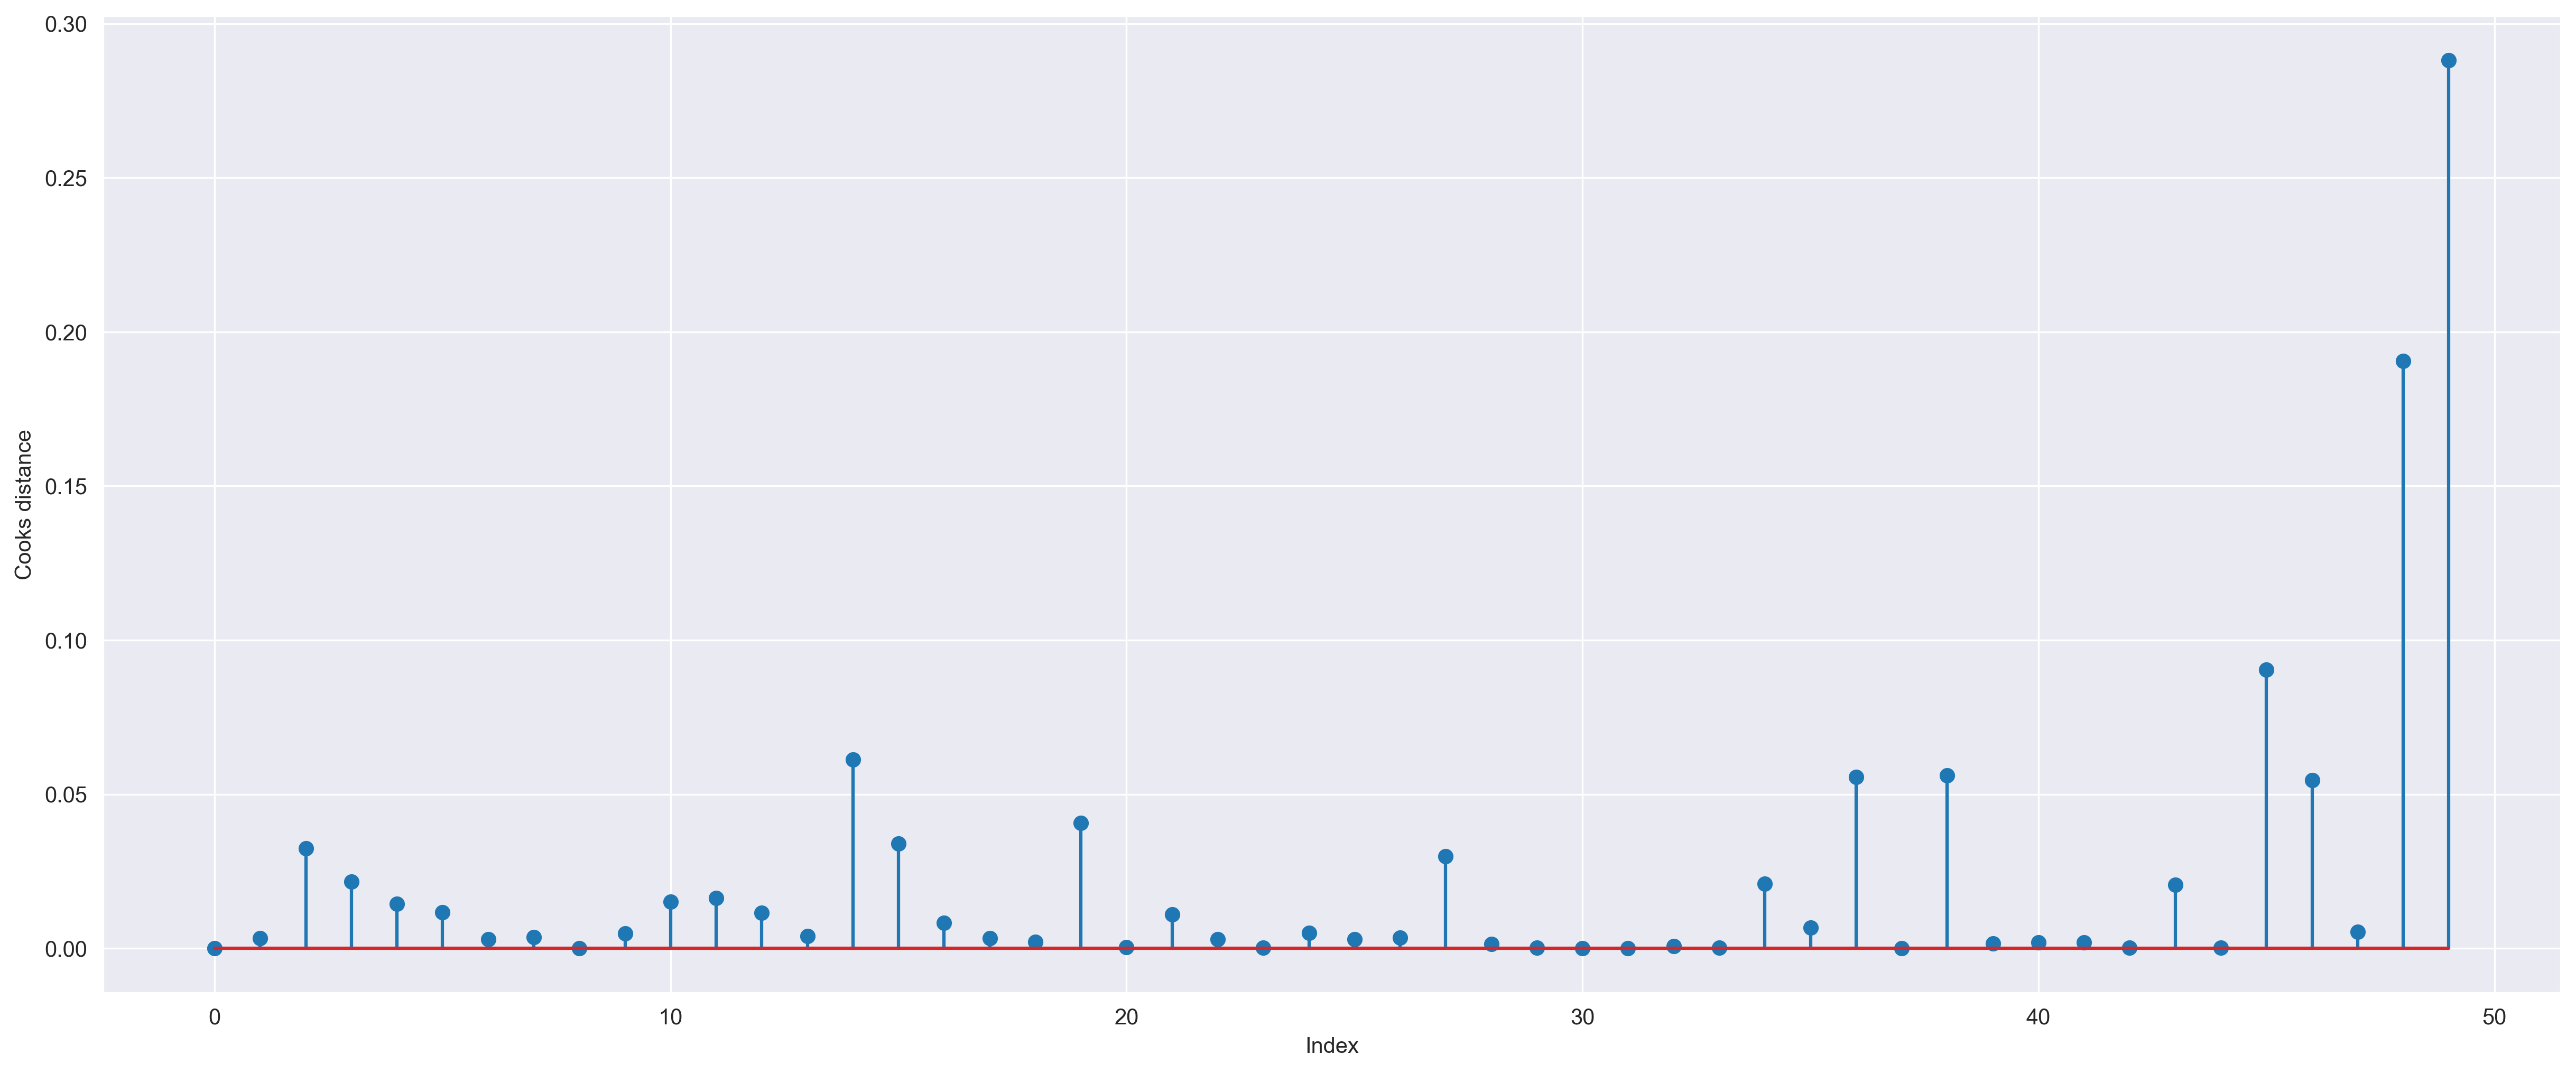

In [47]:
fig=plt.figure(figsize=(20,8))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Index')
plt.ylabel('Cooks distance')

In [48]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

# Leverage Value

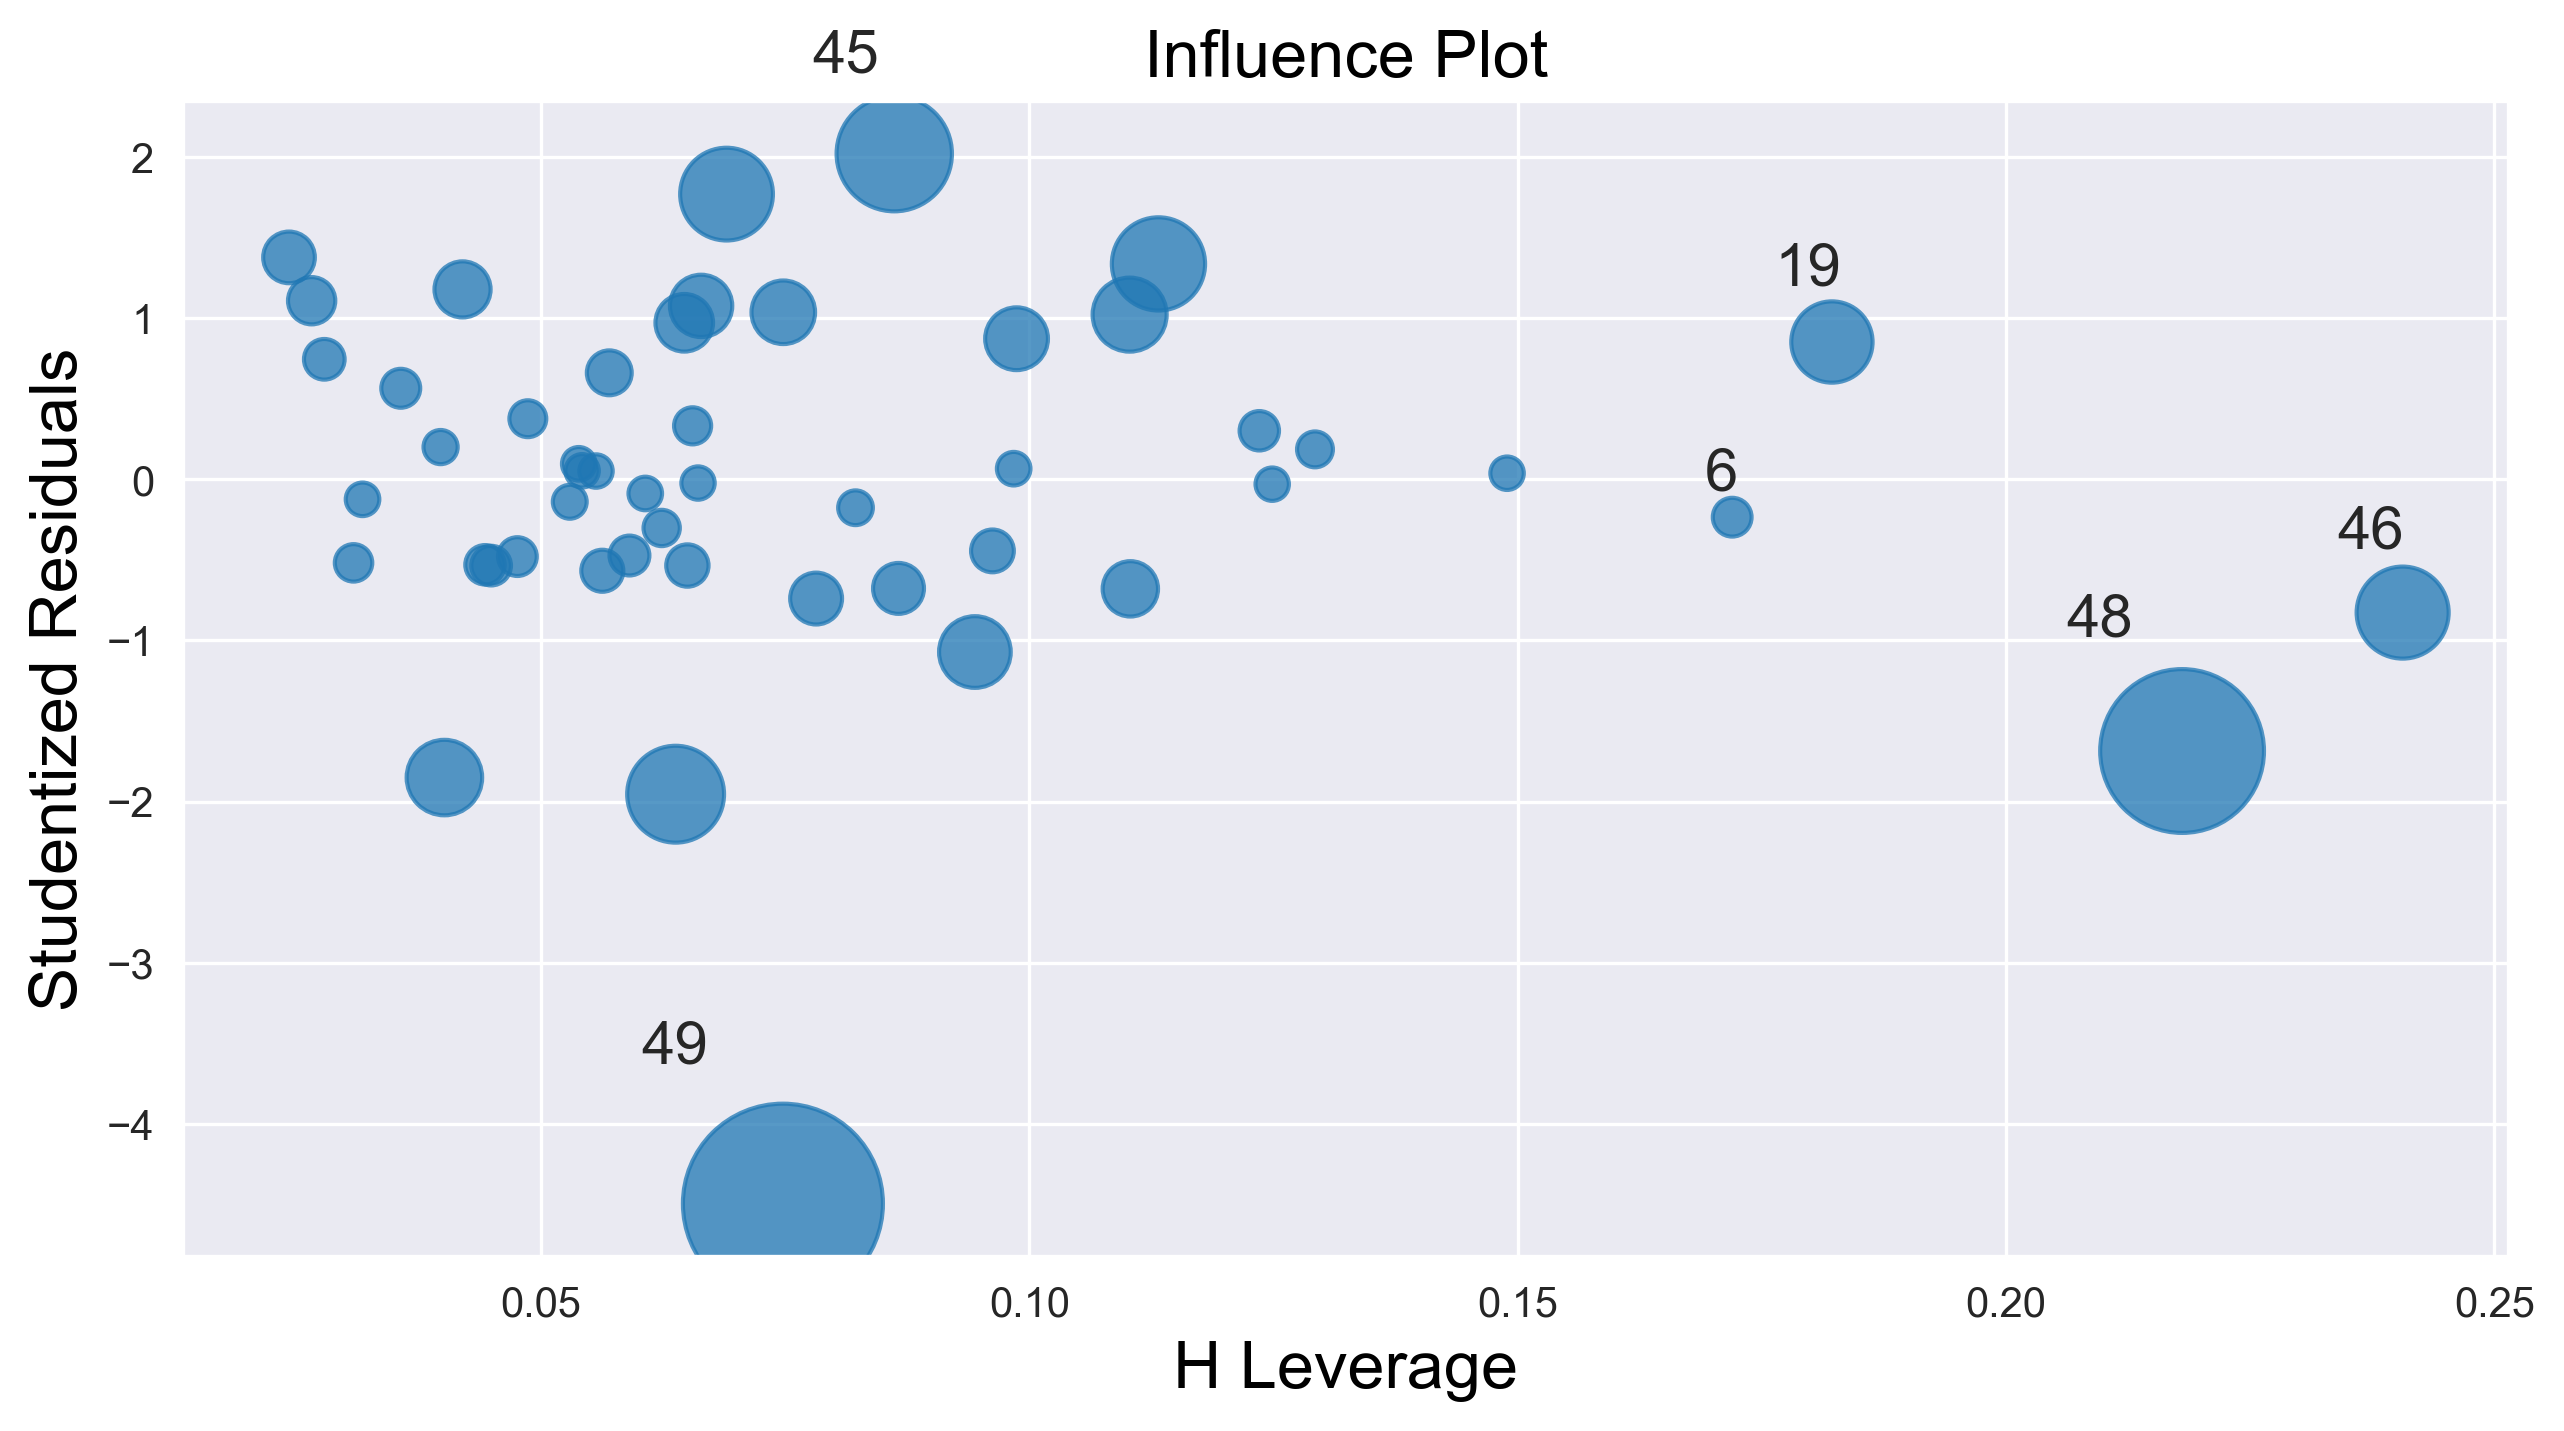

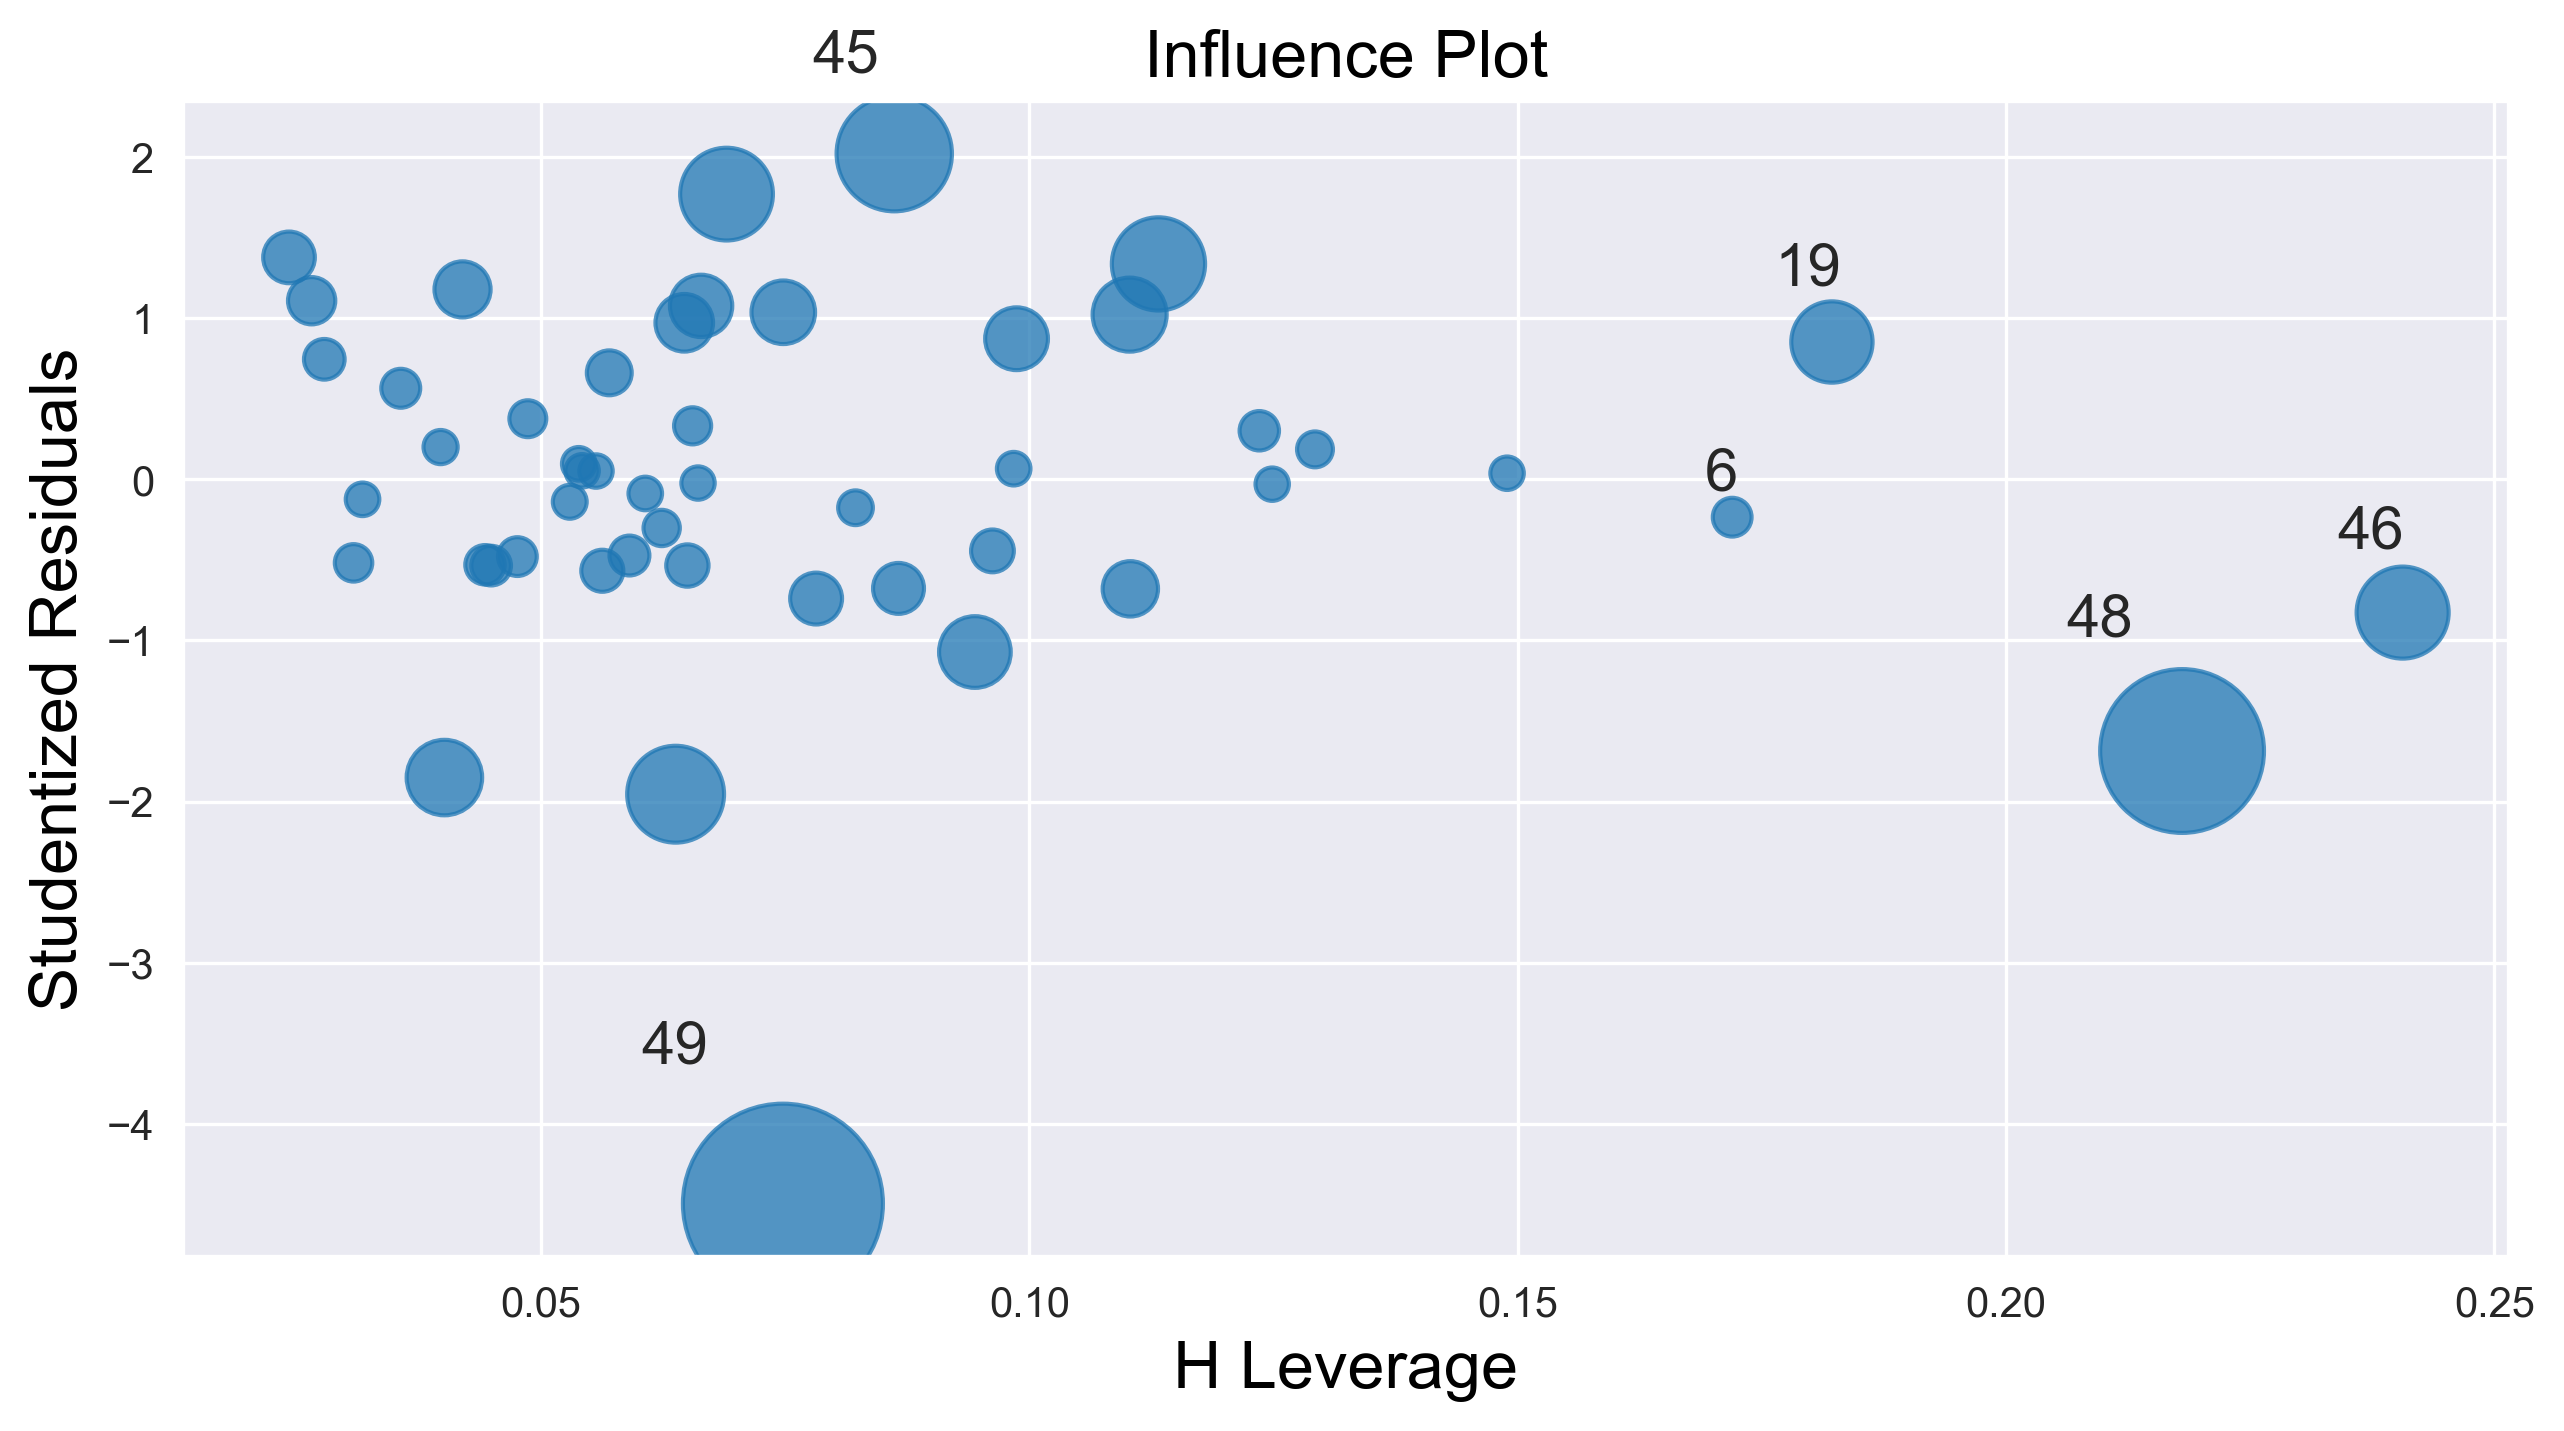

In [49]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)

In [50]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.3

In [51]:
df[df.index.isin([49])]

RDS       ADS      MRKS   Profit
49  0.0  116983.8  45173.06  14681.4

# Improving the model

In [52]:
df_new=df.drop(df.index[[49]],axis=0).reset_index(drop=True)

In [53]:
df_new.tail(5)

RDS        ADS       MRKS    Profit
44  22177.74  154806.14   28334.72  65200.33
45   1000.23  124153.04    1903.93  64926.08
46   1315.46  115816.21  297114.46  49490.75
47      0.00  135426.92       0.00  42559.73
48    542.05   51743.15       0.00  35673.41

# Final Model

In [54]:
final_model= mlr.ols('Profit~RDS+ADS+MRKS', data=df_new).fit()

In [55]:
while final_model.rsquared<0.99:
    for c in [np.max(c)>1]:
        final_model=mlr.ols('Profit~RDS+ADS+MRKS',data=df_new).fit()
        (c,_)=final_model.get_influence().cooks_distance
        c
        np.argmax(c),np.max(c)
        df_new=df_new.drop(df_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df_new
    else:
        final_model=mlr.ols('Profit~RDS+ADS+MRKS',data=df_new).fit()
        final_model.rsquared,final_model.aic
        print('Thus rsquared is improved to',final_model.rsquared)

Thus rsquared is improved to 0.9626766170294073
Thus rsquared is improved to 0.9614129113440602
Thus rsquared is improved to 0.962593650298269
Thus rsquared is improved to 0.9638487279209415
Thus rsquared is improved to 0.9663901957918793
Thus rsquared is improved to 0.9706076169779905
Thus rsquared is improved to 0.9727840588916423
Thus rsquared is improved to 0.9734292907181952
Thus rsquared is improved to 0.9785801571833451
Thus rsquared is improved to 0.9777383743090916
Thus rsquared is improved to 0.9790510088977512
Thus rsquared is improved to 0.9790004461890552
Thus rsquared is improved to 0.9807878666153609
Thus rsquared is improved to 0.9838299343609735
Thus rsquared is improved to 0.9831149926392769
Thus rsquared is improved to 0.9833768520972176
Thus rsquared is improved to 0.9878892536376698
Thus rsquared is improved to 0.9877191935547199
Thus rsquared is improved to 0.9858356627471713
Thus rsquared is improved to 0.9874766829880098
Thus rsquared is improved to 0.9906666289

In [56]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     849.1
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.75e-24
Time:                        17:04:52   Log-Likelihood:                -263.57
No. Observations:                  28   AIC:                             535.1
Df Residuals:                      24   BIC:                             540.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.615e+04   3259.152     14.161      0.000    3.94e+04    5.29e+04
RDS            0.6963      0.030     23.331      0.000       0.635       0.758
ADS            0.0300      0.024      1.250      0.223      -0.020       0.079
MRKS           0.0503      0.011      4.733      0.000       0.028       0.072
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.355
Skew:                           0.535   Prob(JB):                        0.508
Kurtosis:                       2.866   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
final_model.rsquared, final_model.aic

(0.9906666289527223, 535.1364132840074)

In [58]:
df_new

RDS        ADS       MRKS     Profit
0   165349.20  136897.80  471784.10  192261.83
1   142107.34   91391.77  366168.42  166187.94
2   131876.90   99814.71  362861.36  156991.12
3   130298.13  145530.06  323876.68  155752.60
4   120542.52  148718.95  311613.29  152211.77
5   123334.88  108679.17  304981.62  149759.96
6    91992.39  135495.07  252664.93  134307.35
7    94657.16  145077.58  282574.31  125370.37
8    91749.16  114175.79  294919.57  124266.90
9    76253.86  113867.30  298664.47  118474.03
10   67532.53  105751.03  304768.73  108733.99
11   77044.01   99281.34  140574.81  108552.04
12   64664.71  139553.16  137962.62  107404.34
13   75328.87  144135.98  134050.07  105733.54
14   66051.52  182645.56  118148.20  103282.38
15   65605.48  153032.06  107138.38  101004.64
16   61994.48  115641.28   91131.24   99937.59
17   61136.38  152701.92   88218.23   97483.56
18   63408.86  129219.61   46085.25   97427.84
19   55493.95  103057.49  214634.81   96778.92
20   46426.07  157693.92  210797.67   96712.80
21   46014.02   85047.44  205517.64   96479.51
22   44069.95   51283.14  197029.42   89949.14
23   38558.51   82982.09  174999.30   81005.76
24   28754.33  118546.05  172795.67   78239.91
25   27892.92   84710.77  164470.71   77798.83
26   23640.93   96189.63  148001.11   71498.49
27   22177.74  154806.14   28334.72   65200.33

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


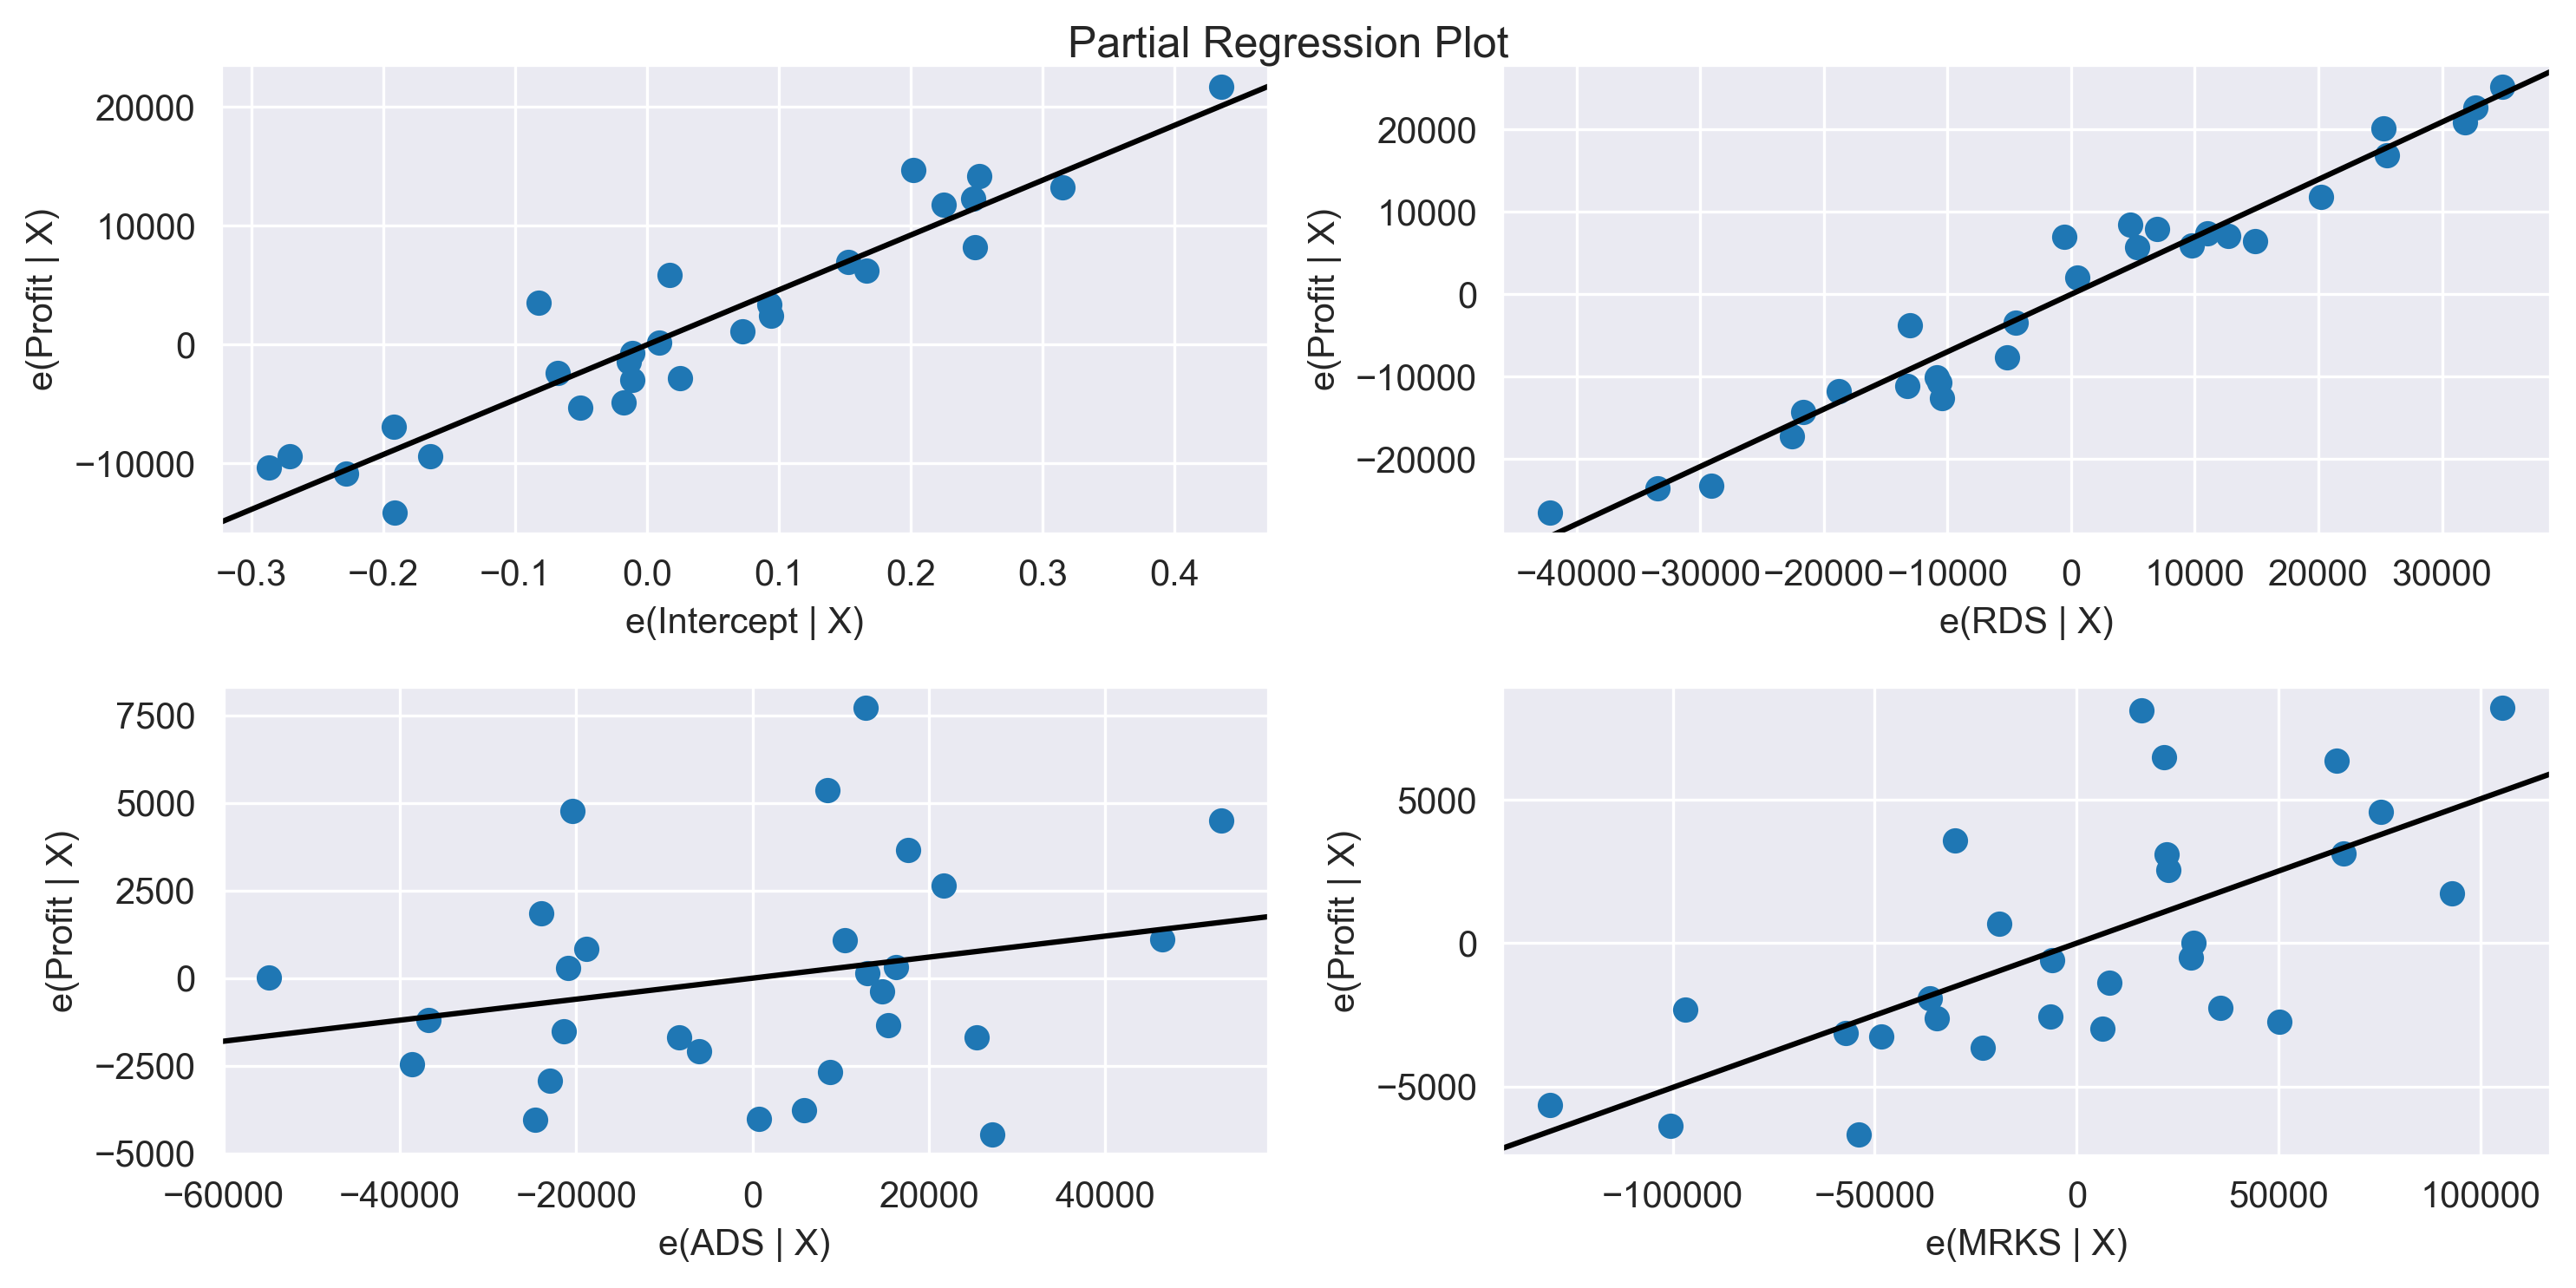

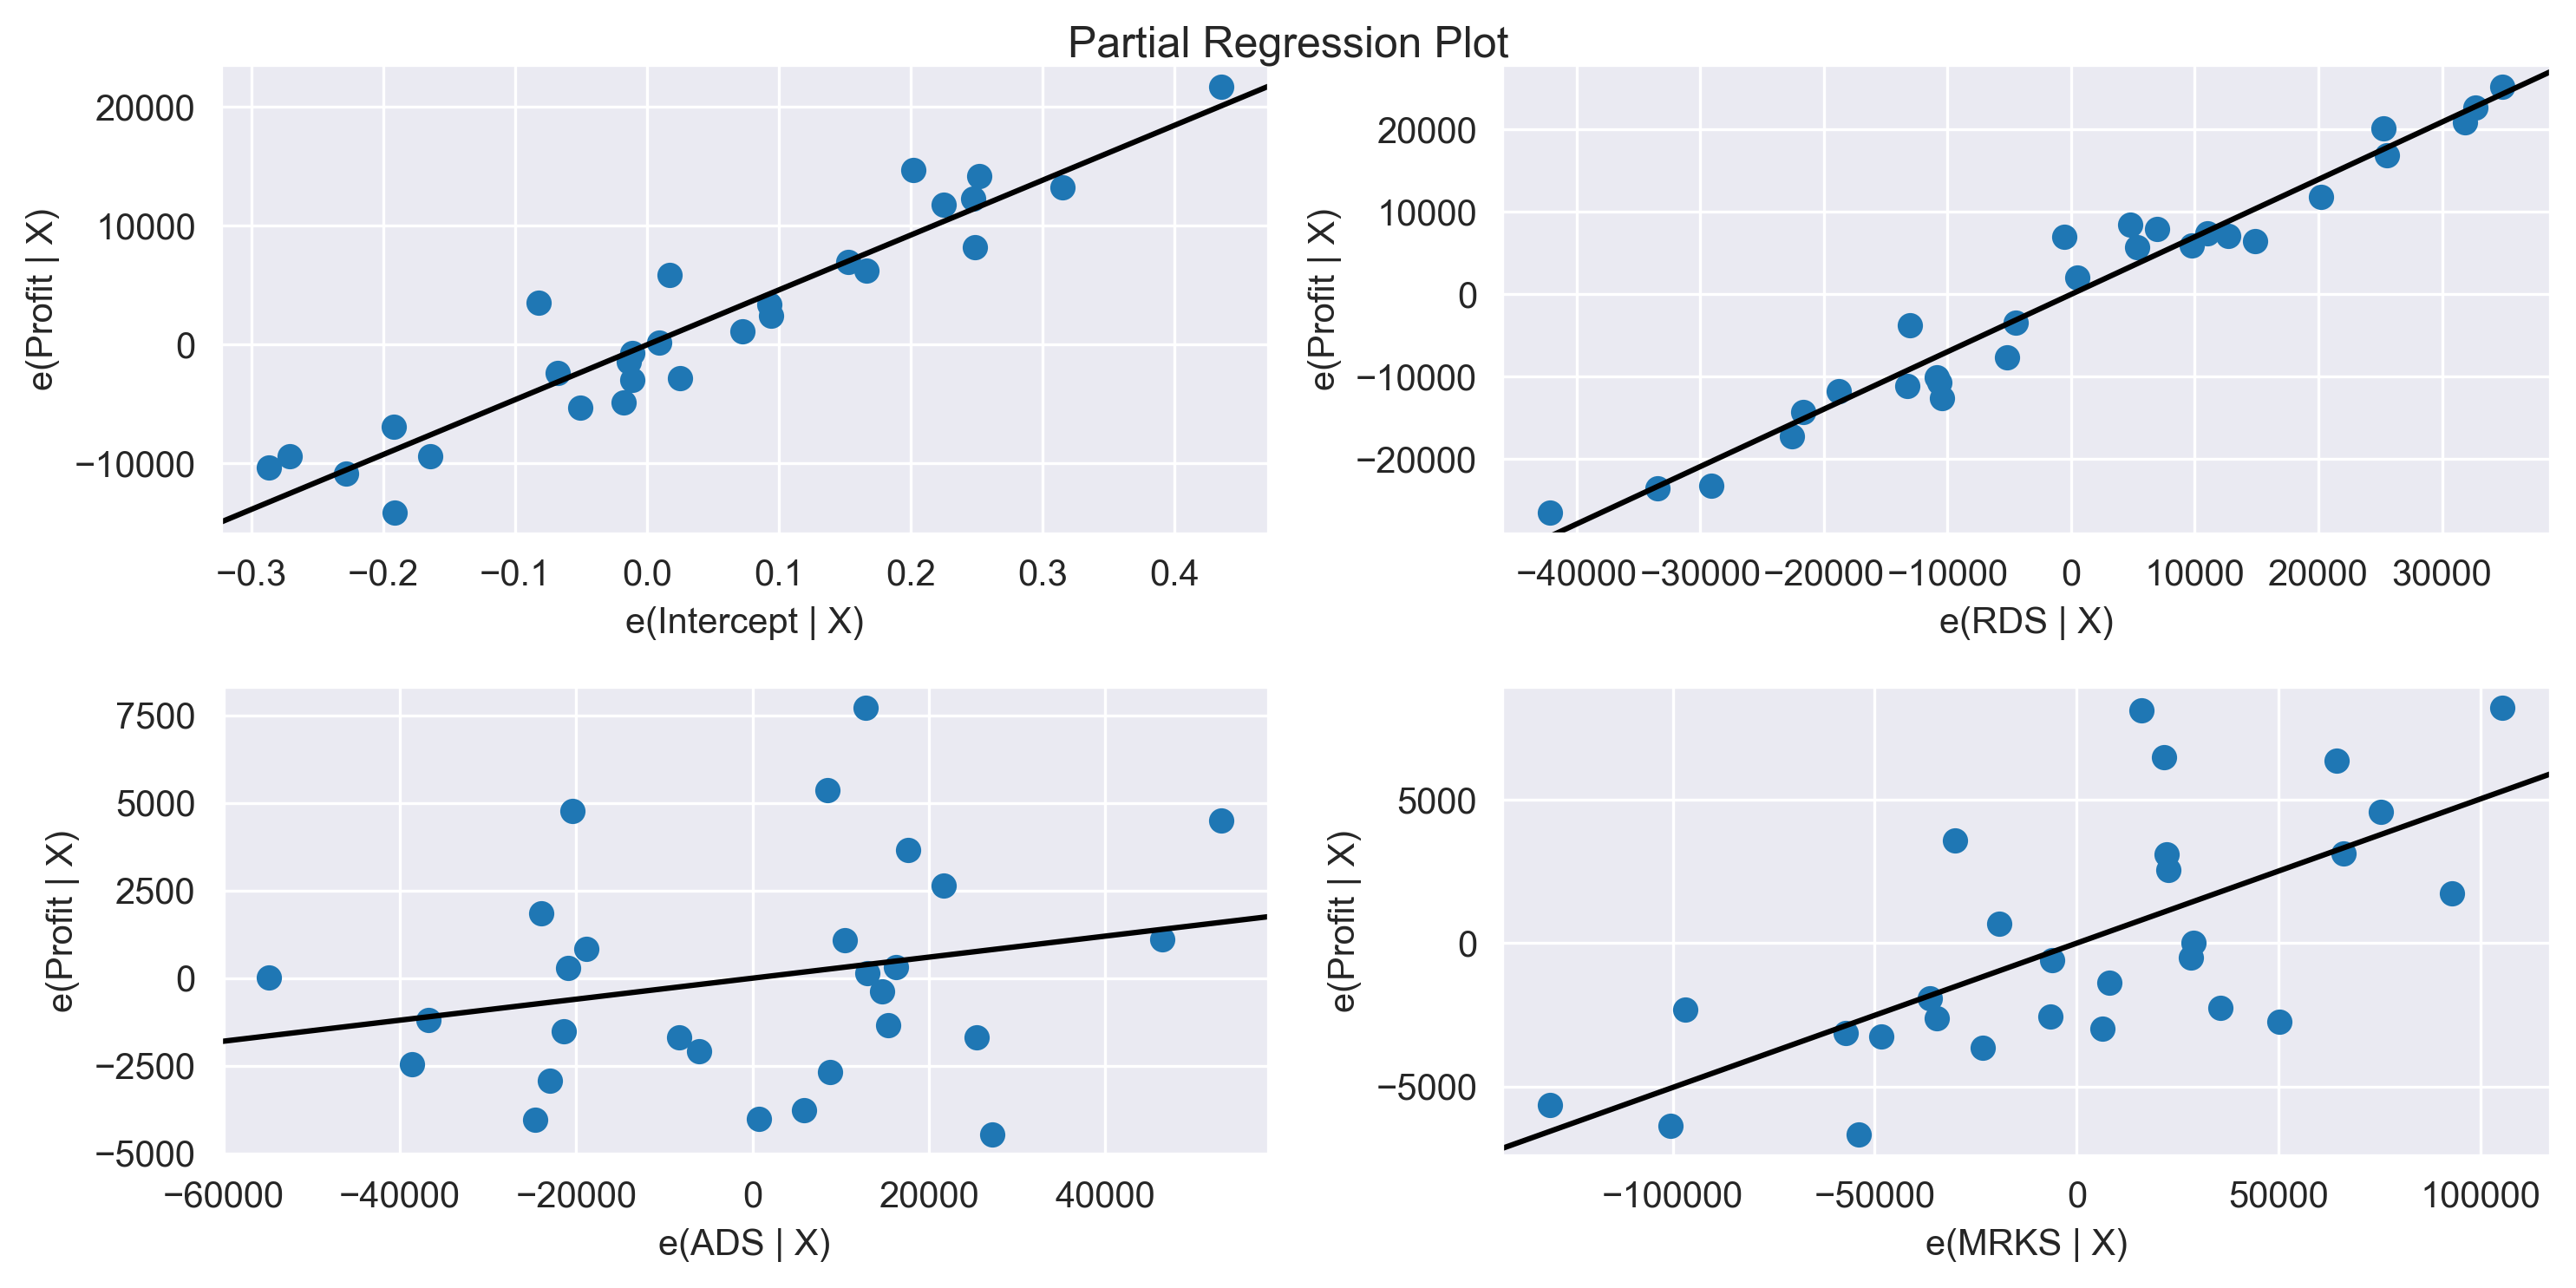

In [59]:
sm.graphics.plot_partregress_grid(final_model)

# Model Prediction

In [60]:
d= {'RDS':[10522,12668],'ADS':[13208,15102],'MRKS':[29788,32714]}

In [61]:
data= pd.DataFrame(d)
data

RDS    ADS   MRKS
0  10522  13208  29788
1  12668  15102  32714

In [62]:
final_model.predict(data)

0    55373.378376
1    57071.747138
dtype: float64

# Table containing r^2 value for prepared models

In [63]:
d={'prepared_models':['Model','Final_model'],'Rsquared':[model1.rsquared,final_model.rsquared]}
table=pd.DataFrame(d)
table

prepared_models  Rsquared
0           Model  0.950746
1     Final_model  0.990667